# Personal Information
Name: **Ray Ren**

StudentID: **15086305**

Email: [**ray.ren@student.uva.nl**](ray.ren@student.uva.nl)

Submitted on: **30.06.2024**

# Scrap the data

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
# from alpha_vantage.timeseries import TimeSeries
import os
import requests

In [3]:
# Function to get the list of current S&P 500 companies from Wikipedia
def get_sp500_tickers():
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    sp500_df = table[0]
    tickers = sp500_df['Symbol'].tolist()
    # Adjusting tickers for compatibility (replacing '.' with '-')
    tickers = [ticker.replace('.', '-') for ticker in tickers]
    return tickers

# Get the list of tickers
sp500_tickers = get_sp500_tickers()

# Convert the list to a DataFrame and save it as a CSV file
sp500_tickers_df = pd.DataFrame(sp500_tickers, columns=['Ticker'])
csv_file_path = './trail/sp500_tickers.csv'
sp500_tickers_df.to_csv(csv_file_path, index=False)

In [4]:
# Function to read tickers from a file
def read_tickers(file_path):
    with open(file_path, 'r') as file:
        tickers = [line.strip() for line in file.readlines()]
    return tickers

# Define the path to the tickers file and output folder
tickers_file_path = './data/sp500_tickers.txt'
output_folder = 'stock_data_yf_new'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Read the list of tickers
tickers = read_tickers(tickers_file_path)

# Retrieve and save data for each ticker
for ticker in tickers:
    print(f"Retrieving data for {ticker}")
    ticker_data = yf.Ticker(ticker)
    ticker_df = ticker_data.history(period='max', interval='1d')

    # Save the data to a CSV file
    output_file_path = os.path.join(output_folder, f"{ticker}.csv")
    ticker_df.to_csv(output_file_path)

print("Data retrieval complete.")

Data retrieval complete.


In [12]:
# Define the paths
folder_path = 'stock_data_yf_new'
tickers_file_path = './data/sp500_tickers.txt'

# Function to count the number of files in a directory
def count_files_in_directory(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# Function to count the number of lines in a file
def count_lines_in_file(file_path):
    with open(file_path, 'r') as file:
        return sum(1 for line in file)

# Count the files in the directory
num_files = count_files_in_directory(folder_path)
print(f"Number of files in '{folder_path}': {num_files}")

# Count the lines in the tickers file
num_lines = count_lines_in_file(tickers_file_path)
print(f"Number of lines in '{tickers_file_path}': {num_lines}")

# Statistical Analysis with explain the data

## AAPL

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [8]:
data=pd.read_csv("./AAPL_full_history_stock_data.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

/var/folders/vc/rsz0psl95p91gtznnnjzrxb80000gn/T/ipykernel_96551/4158142259.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'])


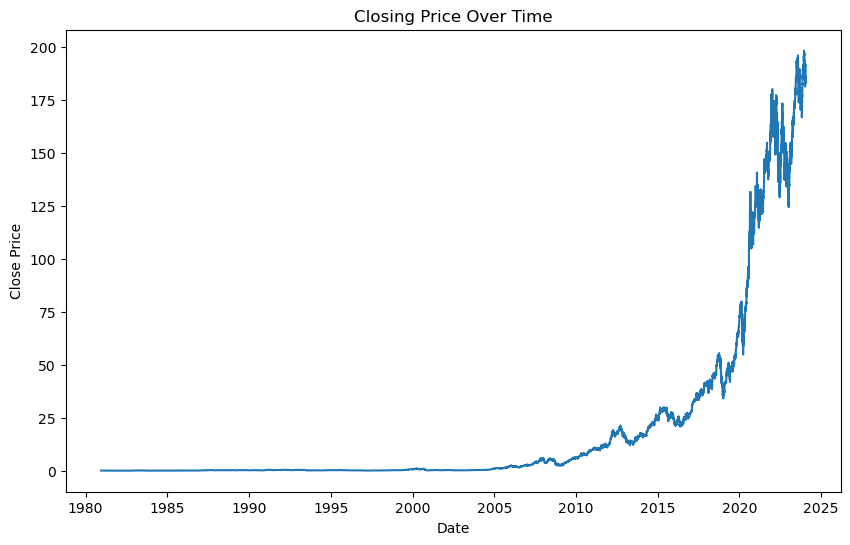

In [9]:
# Plot the closing prices to see the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=data['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [10]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['Close'], model='additive', period=50)  # adjust the period based on data frequency

In [11]:
# Extract the residual component and use a unique name
additive_residuals = decomposition.resid.dropna()  # Drop NA to handle the edges

mae = np.mean(np.abs(additive_residuals))
mse = np.mean(additive_residuals ** 2)
rmse = np.sqrt(mse)

# Print the results
print("Mean Absolute Error ALL (MAE):", mae)
print("Mean Squared Error ALL(MSE):", mse)
print("Root Mean Squared Error ALL (RMSE):", rmse)

Mean Absolute Error ALL (MAE): 0.586955313132424
Mean Squared Error ALL(MSE): 2.594229463435785
Root Mean Squared Error ALL (RMSE): 1.6106611882813173


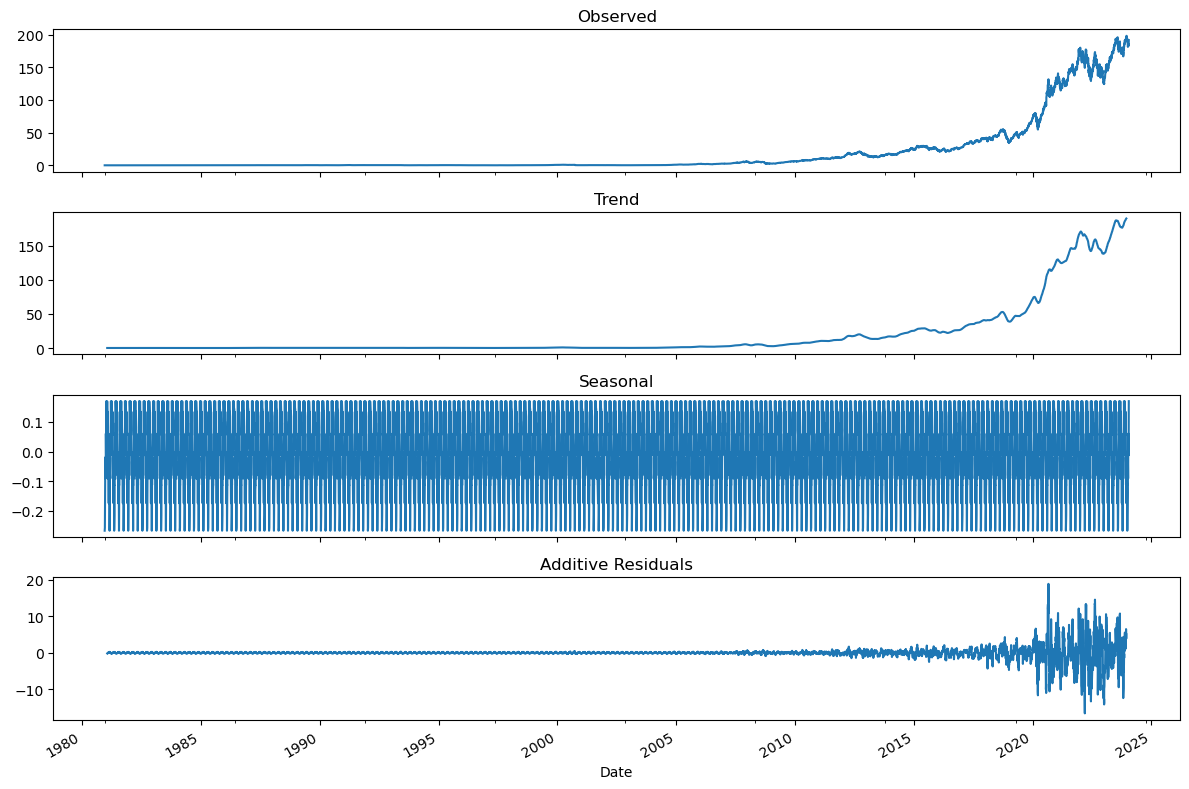

In [13]:
# Plot the components to visualize
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12, 8))
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
additive_residuals.plot(ax=axes[3], title='Additive Residuals')
plt.tight_layout()
plt.show()

In [14]:
stl = STL(data['Close'], seasonal=51, period=50)  # 'seasonal' must be an odd integer
stl_result = stl.fit()

In [15]:
# Extract the residuals
residuals = stl_result.resid.dropna()  # Drop NA values which are typically at the start/end

# Calculate MSE, MAE, and RMSE
mse = np.mean(np.square(residuals))
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(mse)

# Print the results
print("Mean Squared Error ALL (MSE):", mse)
print("Mean Absolute Error ALL (MAE):", mae)
print("Root Mean Squared Error ALL (RMSE):", rmse)

Mean Squared Error ALL (MSE): 2.4005689765077074
Mean Absolute Error ALL (MAE): 0.5174570631464268
Root Mean Squared Error ALL (RMSE): 1.5493769639786528


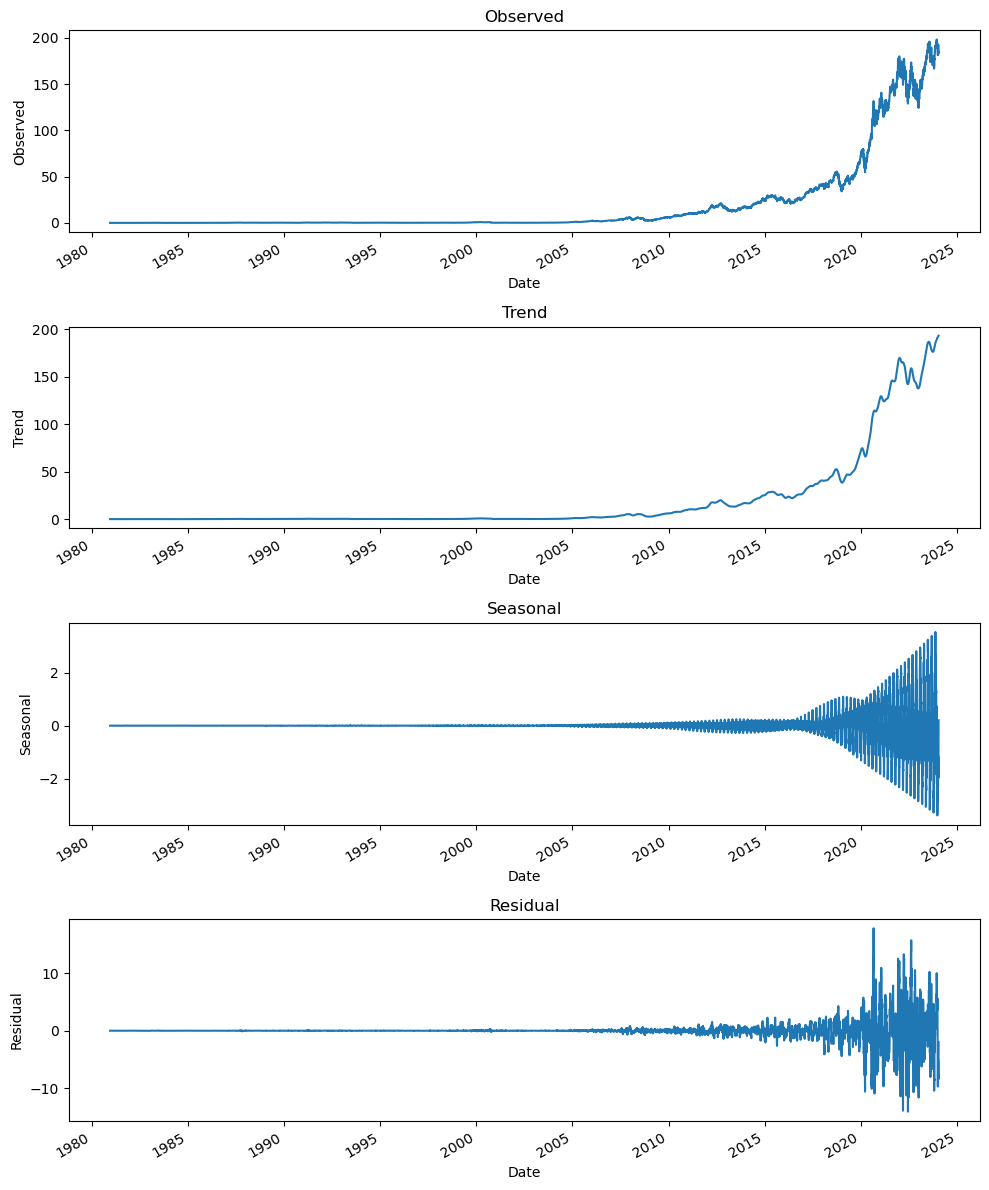

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(10, 12))
stl_result.observed.plot(ax=axes[0], title='Observed')
axes[0].set_ylabel('Observed')

stl_result.trend.plot(ax=axes[1], title='Trend')
axes[1].set_ylabel('Trend')

stl_result.seasonal.plot(ax=axes[2], title='Seasonal')
axes[2].set_ylabel('Seasonal')

stl_result.resid.plot(ax=axes[3], title='Residual')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

## TSLA

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [18]:
TSLA=pd.read_csv("./TSLA.csv")
TSLA['Date'] = pd.to_datetime(TSLA['Date'])
TSLA.set_index('Date', inplace=True)

/var/folders/vc/rsz0psl95p91gtznnnjzrxb80000gn/T/ipykernel_96551/594569723.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  TSLA['Date'] = pd.to_datetime(TSLA['Date'])


In [19]:
decomposition = seasonal_decompose(TSLA['Close'], model='additive', period=50)  # adjust the period based on data frequency
additive_residuals = decomposition.resid.dropna()  # Drop NA to handle the edges


mae = np.mean(np.abs(additive_residuals))
mse = np.mean(additive_residuals ** 2)
rmse = np.sqrt(mse)

# Print the results
print("Mean Absolute Error ALL (MAE):", mae)
print("Mean Squared Error ALL(MSE):", mse)
print("Root Mean Squared Error ALL (RMSE):", rmse)


Mean Absolute Error ALL (MAE): 5.189617012017608
Mean Squared Error ALL(MSE): 95.624287642039
Root Mean Squared Error ALL (RMSE): 9.778767184161763


In [20]:
stl = STL(TSLA['Close'], seasonal=51, period=50)  # 'seasonal' must be an odd integer
stl_result = stl.fit()
# Extract the residuals
residuals = stl_result.resid.dropna()  # Drop NA values which are typically at the start/end

# Calculate MSE, MAE, and RMSE
mse = np.mean(np.square(residuals))
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(mse)

# Print the results
print("Mean Squared Error ALL (MSE):", mse)
print("Mean Absolute Error ALL (MAE):", mae)
print("Root Mean Squared Error ALL (RMSE):", rmse)

Mean Squared Error ALL (MSE): 86.02761324018057
Mean Absolute Error ALL (MAE): 4.396539039993795
Root Mean Squared Error ALL (RMSE): 9.275107182139761


Seasonal Decompose: Uses simpler moving averages to estimate trend and seasonal components, which can be less effective for complex patterns. It supports only basic additive or multiplicative models without the customization capabilities provided by Loess smoothing.

STL: Offers more flexibility and is generally more robust than classical decomposition methods. STL allows for setting different parameters for the seasonal component and can handle any type of seasonality, not just fixed seasonal effects. The use of Loess (or local regression) for both trend and seasonal components makes it adaptable to more complex and nuanced patterns in data.

# Statistical model

## ARIMA Model Implementation for AAPL

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [22]:
# Load data
df = pd.read_csv("./AAPL_full_history_stock_data.csv", index_col='Date', parse_dates=True)
df.index = pd.to_datetime(df.index, utc=True)

# Check if the index is datetime
if not isinstance(df.index, pd.DatetimeIndex):
    print("Index is not a datetime type. Setting index as datetime...")
    df.index = pd.to_datetime(df.index)

# Ensure a continuous index with a uniform frequency
print("Index frequency:", df.index.inferred_freq)
if df.index.inferred_freq is None:
    print("Index does not have a recognized frequency. Attempting to set a regular frequency...")
    df = df.asfreq('B')  # 'B' stands for business day frequency
    df = df.fillna(method='ffill')  # Forward fill to handle missing values if any

print("New index frequency:", df.index.inferred_freq)

Index frequency: None
Index does not have a recognized frequency. Attempting to set a regular frequency...
New index frequency: B


/var/folders/vc/rsz0psl95p91gtznnnjzrxb80000gn/T/ipykernel_96551/3708299043.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill to handle missing values if any


In [23]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(inplace=True)
# Print the total number of rows after cleaning
print("Total number of rows in the dataset after cleaning:", df.shape[0])

Total number of rows in the dataset after cleaning: 11246


In [24]:
# Calculate the split index
split_index = int(len(df) * 0.8)  # 80% for training

# Split data into train and test sets
train = df['Close'].iloc[:split_index]
test = df['Close'].iloc[split_index:]

# Print the total number of rows in the dataset after cleaning
print("Total number of rows in the dataset after cleaning:", df.shape[0])

# Print details about the train and test sets
print("Number of rows in the train set:", train.shape[0])
print("Number of rows in the test set:", test.shape[0])

Total number of rows in the dataset after cleaning: 11246
Number of rows in the train set: 8996
Number of rows in the test set: 2250


In [25]:
# Check for NaNs in the training dataset
if train.isna().any():
    print("NaN values detected in training data.")
else:
    print("No NaN values in training data.")

No NaN values in training data.


In [26]:
def perform_adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    return result

adf_result = perform_adf_test(train)
d_value = 0 if adf_result[1] < 0.05 else 1

ADF Statistic: 3.5213937480610222
p-value: 1.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [27]:
model_arima = auto_arima(train, start_p=0, start_q=0, max_p=3, max_q=3, m=1, d=d_value, seasonal=False, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True, maxiter=50)
fc, confint = model_arima.predict(n_periods=len(test), return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11731.261, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11729.263, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11729.261, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11727.639, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11727.261, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.424 seconds


In [28]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(confint[:, 0], index=test.index)
upper_series = pd.Series(confint[:, 1], index=test.index)

In [29]:
# Calculate errors
mse = np.mean((test.values - fc_series.values) ** 2)
mae = np.mean(np.abs(test.values - fc_series.values))
rmse = np.sqrt(mse)

# Print the error metrics
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

Mean Squared Error (MSE): 4882.974
Mean Absolute Error (MAE): 48.945
Root Mean Squared Error (RMSE): 69.878


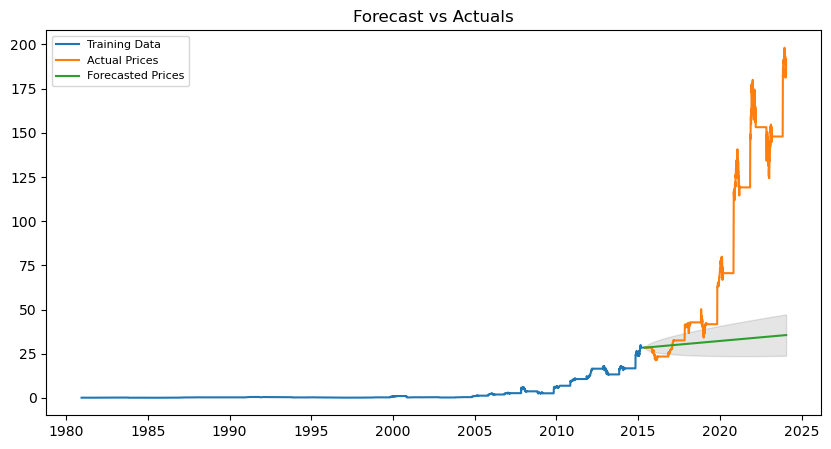

In [30]:
# Plot the forecast against the actual outcomes
plt.figure(figsize=(10, 5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices')
plt.plot(fc_series, label='Forecasted Prices')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.1)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## ETS Model Implementation for AAPL

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
# Load data
df = pd.read_csv("./AAPL_full_history_stock_data.csv", index_col='Date', parse_dates=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')  # Convert 'Close' to numeric, handle non-numeric gracefully
df.dropna(inplace=True)  # Drop any rows with NaN values which might be introduced by invalid parsing


In [33]:
# Calculate the split index
split_index = int(len(df) * 0.8)  # 80% for training

# Split data into train and test sets
train = df['Close'].iloc[:split_index]
test = df['Close'].iloc[split_index:]

# Print the total number of rows in the dataset after cleaning
print("Total number of rows in the dataset after cleaning:", df.shape[0])

# Print details about the train and test sets
print("Number of rows in the train set:", train.shape[0])
print("Number of rows in the test set:", test.shape[0])

Total number of rows in the dataset after cleaning: 10866
Number of rows in the train set: 8692
Number of rows in the test set: 2174


In [34]:
# Fit an ETS Model
model_ets = ExponentialSmoothing(train, trend='add', seasonal=None, damped_trend=True, seasonal_periods=None).fit()

# Forecast for the length of the test set
ets_forecast = model_ets.forecast(len(test))

/Users/songyuren/anaconda3/envs/GNN/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/songyuren/anaconda3/envs/GNN/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/songyuren/anaconda3/envs/GNN/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [35]:
# Calculate error metrics
mse = mean_squared_error(test, ets_forecast)
mae = mean_absolute_error(test, ets_forecast)
rmse = np.sqrt(mse)

# Print the error metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Mean Squared Error (MSE): 6010.276
Mean Absolute Error (MAE): 55.379
Root Mean Squared Error (RMSE): 77.526


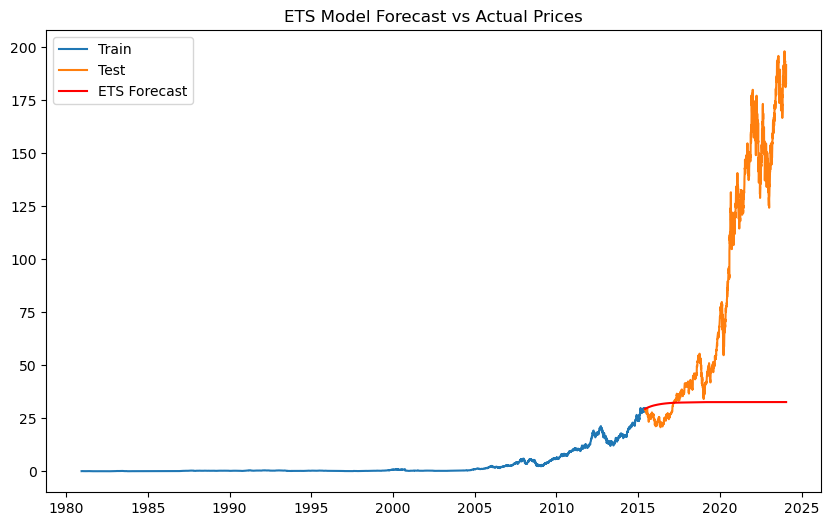

In [36]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ets_forecast, color='red', label='ETS Forecast')
plt.title('ETS Model Forecast vs Actual Prices')
plt.legend()
plt.show()

## ARIMA model for TSLA 

In [37]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [38]:
# Load data
df = pd.read_csv("./TSLA.csv", index_col='Date', parse_dates=True)
df.index = pd.to_datetime(df.index, utc=True)

# Check if the index is datetime
if not isinstance(df.index, pd.DatetimeIndex):
    print("Index is not a datetime type. Setting index as datetime...")
    df.index = pd.to_datetime(df.index)

# Ensure a continuous index with a uniform frequency
print("Index frequency:", df.index.inferred_freq)
if df.index.inferred_freq is None:
    print("Index does not have a recognized frequency. Attempting to set a regular frequency...")
    df = df.asfreq('B')  # 'B' stands for business day frequency
    df = df.fillna(method='ffill')  # Forward fill to handle missing values if any

print("New index frequency:", df.index.inferred_freq)

Index frequency: None
Index does not have a recognized frequency. Attempting to set a regular frequency...
New index frequency: B


/var/folders/vc/rsz0psl95p91gtznnnjzrxb80000gn/T/ipykernel_96551/1559601412.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill to handle missing values if any


In [39]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(inplace=True)
# Print the total number of rows after cleaning
print("Total number of rows in the dataset after cleaning:", df.shape[0])

Total number of rows in the dataset after cleaning: 3539


In [40]:
# Calculate the split index
split_index = int(len(df) * 0.8)  # 80% for training

# Split data into train and test sets
train = df['Close'].iloc[:split_index]
test = df['Close'].iloc[split_index:]

# Print the total number of rows in the dataset after cleaning
print("Total number of rows in the dataset after cleaning:", df.shape[0])

# Print details about the train and test sets
print("Number of rows in the train set:", train.shape[0])
print("Number of rows in the test set:", test.shape[0])

Total number of rows in the dataset after cleaning: 3539
Number of rows in the train set: 2831
Number of rows in the test set: 708


In [41]:
# Check for NaNs in the training dataset
if train.isna().any():
    print("NaN values detected in training data.")
else:
    print("No NaN values in training data.")


No NaN values in training data.


In [42]:
def perform_adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    return result

adf_result = perform_adf_test(train)
d_value = 0 if adf_result[1] < 0.05 else 1


ADF Statistic: 2.937424893217623
p-value: 1.0
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [43]:
model_arima = auto_arima(train, start_p=0, start_q=0, max_p=3, max_q=3, m=1, d=d_value, seasonal=False, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True, maxiter=50)
fc, confint = model_arima.predict(n_periods=len(test), return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13395.663, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13371.749, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13372.522, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13396.304, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13373.208, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13372.772, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13374.393, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=13372.954, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.037 seconds


In [44]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(confint[:, 0], index=test.index)
upper_series = pd.Series(confint[:, 1], index=test.index)

In [45]:
# Calculate errors
mse = np.mean((test.values - fc_series.values) ** 2)
mae = np.mean(np.abs(test.values - fc_series.values))
rmse = np.sqrt(mse)

# Print the error metrics
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

Mean Squared Error (MSE): 5958.269
Mean Absolute Error (MAE): 58.044
Root Mean Squared Error (RMSE): 77.190


## ETS model TSLA

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
# Load data
df = pd.read_csv("./TSLA.csv", index_col='Date', parse_dates=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')  # Convert 'Close' to numeric, handle non-numeric gracefully
df.dropna(inplace=True)  # Drop any rows with NaN values which might be introduced by invalid parsing


In [48]:
# Calculate the split index
split_index = int(len(df) * 0.8)  # 80% for training

# Split data into train and test sets
train = df['Close'].iloc[:split_index]
test = df['Close'].iloc[split_index:]

# Print the total number of rows in the dataset after cleaning
print("Total number of rows in the dataset after cleaning:", df.shape[0])

# Print details about the train and test sets
print("Number of rows in the train set:", train.shape[0])
print("Number of rows in the test set:", test.shape[0])

Total number of rows in the dataset after cleaning: 3413
Number of rows in the train set: 2730
Number of rows in the test set: 683


In [49]:
# Fit an ETS Model
model_ets = ExponentialSmoothing(train, trend='add', seasonal=None, damped_trend=True, seasonal_periods=None).fit()

# Forecast for the length of the test set
ets_forecast = model_ets.forecast(len(test))

/Users/songyuren/anaconda3/envs/GNN/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/songyuren/anaconda3/envs/GNN/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/songyuren/anaconda3/envs/GNN/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [50]:
# Calculate error metrics
mse = mean_squared_error(test, ets_forecast)
mae = mean_absolute_error(test, ets_forecast)
rmse = np.sqrt(mse)

# Print the error metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Mean Squared Error (MSE): 3708.006
Mean Absolute Error (MAE): 46.596
Root Mean Squared Error (RMSE): 60.893


# Deep learning model

## LSTM with full data with conformal prediction

### AAPL

In [51]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn

In [52]:
# Load data
data = pd.read_csv('./AAPL_full_history_stock_data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index, utc=True)  # Convert to UTC datetime

# Apply scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']].values)
# Convert numpy array back to DataFrame
df_scaled = pd.DataFrame(data_scaled, index=data.index, columns=['Scaled_Close'])
# Filter data
# df_filtered = df_scaled[df_scaled.index > pd.Timestamp('2008-01-01', tz='UTC')]

In [53]:
# Create sequences
def create_sequences(data, sequence_length=50):
    xs, ys = [], []
    data = data.values.flatten()  # Ensure data is a flattened numpy array
    for i in range(len(data) - sequence_length):
        xs.append(data[i:(i + sequence_length)])
        ys.append(data[i + sequence_length])
    return np.array(xs), np.array(ys)

X, y = create_sequences(df_scaled)

In [54]:
# Convert to tensors
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add a channel dimension
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Ensure y is [batch_size, 1]

# Split data
split_point = int(0.8 * len(X))
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [55]:
# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [56]:
# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.0):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        return self.fc(out[:, -1, :])


In [57]:
# Initialize model, loss, and optimizer
device = torch.device('mps' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size=1, hidden_size=10, num_layers=2, output_size=1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [58]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_losses = []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    avg_train_loss = np.mean(train_losses)
    test_losses = []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            test_loss = criterion(outputs, y_batch)
            test_losses.append(test_loss.item())

    avg_test_loss = np.mean(test_losses)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

Epoch 1/5, Train Loss: 0.0080, Test Loss: 0.1530
Epoch 2/5, Train Loss: 0.0005, Test Loss: 0.1618
Epoch 3/5, Train Loss: 0.0004, Test Loss: 0.1580
Epoch 4/5, Train Loss: 0.0004, Test Loss: 0.1556
Epoch 5/5, Train Loss: 0.0004, Test Loss: 0.1540


In [59]:
# After training, evaluate on test data
all_preds, all_y = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        all_preds.extend(outputs.cpu().numpy())
        all_y.extend(y_batch.cpu().numpy())

# Convert lists to numpy arrays for easier manipulation
all_preds = np.array(all_preds)
all_y = np.array(all_y)

# Calculate MAE and RMSE using numpy
mse = np.mean((all_preds - all_y) ** 2)
mae = np.mean(np.abs(all_preds - all_y))
rmse = np.sqrt(mse)

# Output the results
print(f'Test MSE: {mse:.4f}')
print(f'Test MAE: {mae:.4f}')
print(f'Test RMSE: {rmse:.4f}')

Test MSE: 0.1516
Test MAE: 0.2884
Test RMSE: 0.3894


In [60]:
device = torch.device('mps' if torch.cuda.is_available() else 'cpu')
model.to(device)

LSTMModel(
  (lstm): LSTM(1, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [61]:
def conformal_prediction(model, train_loader, test_loader, device, scaler, alpha):
    model.eval()
    all_train_scores = []
    # Calculate the absolute differences for the training set to find the quantile
    with torch.no_grad():
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch)
            scores = torch.abs(y_pred - y_batch).cpu().numpy()
            all_train_scores.extend(scores)

    # Compute the quantile for the confidence level
    quantile = np.quantile(all_train_scores, 1 - alpha)
    predictions, intervals = [], []
    
    # Generate predictions and intervals for the test set
    with torch.no_grad():
        for x_batch, _ in test_loader:
            x_batch = x_batch.to(device)
            y_pred = model(x_batch)
            lower_bounds = y_pred - quantile
            upper_bounds = y_pred + quantile
            predictions.extend(y_pred.cpu().numpy())
            intervals.extend(list(zip(lower_bounds.cpu().numpy(), upper_bounds.cpu().numpy())))

    # Convert predictions and intervals back to original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    intervals = [(scaler.inverse_transform(np.array([low]).reshape(-1, 1))[0][0],
                  scaler.inverse_transform(np.array([high]).reshape(-1, 1))[0][0]) for low, high in intervals]
    
    return predictions, intervals

In [62]:
# Using different alpha values
alpha_values = [0.05, 0.04, 0.03, 0.02, 0.01]
for alpha in alpha_values:
    predictions, intervals = conformal_prediction(model, train_loader, test_loader, device, scaler, alpha)
    y_test_scaled_back = scaler.inverse_transform(y_test.cpu().numpy())
    in_interval = [lower <= actual <= upper for actual, (lower, upper) in zip(y_test_scaled_back.flatten(), intervals)]
    percentage_in_interval = 100 * sum(in_interval) / len(in_interval)
    print(f"Alpha {alpha:.2f}: Percentage of actual values within prediction intervals: {percentage_in_interval:.2f}%")

Alpha 0.05: Percentage of actual values within prediction intervals: 40.02%
Alpha 0.04: Percentage of actual values within prediction intervals: 40.11%
Alpha 0.03: Percentage of actual values within prediction intervals: 40.11%
Alpha 0.02: Percentage of actual values within prediction intervals: 40.16%
Alpha 0.01: Percentage of actual values within prediction intervals: 40.16%


### TSLA

In [63]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn

In [64]:
# Load data
data = pd.read_csv('./TSLA.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index, utc=True)  # Convert to UTC datetime

# Apply scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']].values)
# Convert numpy array back to DataFrame
df_scaled = pd.DataFrame(data_scaled, index=data.index, columns=['Scaled_Close'])
# Filter data
# df_filtered = df_scaled[df_scaled.index > pd.Timestamp('2008-01-01', tz='UTC')]

In [65]:
# Create sequences
def create_sequences(data, sequence_length=50):
    xs, ys = [], []
    data = data.values.flatten()  # Ensure data is a flattened numpy array
    for i in range(len(data) - sequence_length):
        xs.append(data[i:(i + sequence_length)])
        ys.append(data[i + sequence_length])
    return np.array(xs), np.array(ys)

X, y = create_sequences(df_scaled)

In [66]:
# Convert to tensors
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Add a channel dimension
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Ensure y is [batch_size, 1]

# Split data
split_point = int(0.8 * len(X))
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [67]:
# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [68]:
# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.0):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        return self.fc(out[:, -1, :])

In [69]:
# Initialize model, loss, and optimizer
device = torch.device('mps' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size=1, hidden_size=10, num_layers=2, output_size=1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [70]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_losses = []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    avg_train_loss = np.mean(train_losses)
    test_losses = []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            test_loss = criterion(outputs, y_batch)
            test_losses.append(test_loss.item())

    avg_test_loss = np.mean(test_losses)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

Epoch 1/5, Train Loss: 0.0190, Test Loss: 0.2470
Epoch 2/5, Train Loss: 0.0221, Test Loss: 0.2580
Epoch 3/5, Train Loss: 0.0205, Test Loss: 0.2561
Epoch 4/5, Train Loss: 0.0184, Test Loss: 0.2358
Epoch 5/5, Train Loss: 0.0157, Test Loss: 0.1953


In [71]:
# After training, evaluate on test data
all_preds, all_y = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        all_preds.extend(outputs.cpu().numpy())
        all_y.extend(y_batch.cpu().numpy())

# Convert lists to numpy arrays for easier manipulation
all_preds = np.array(all_preds)
all_y = np.array(all_y)

# Calculate MAE and RMSE using numpy
mse = np.mean((all_preds - all_y) ** 2)
mae = np.mean(np.abs(all_preds - all_y))
rmse = np.sqrt(mse)

# Output the results
print(f'Test MSE: {mse:.4f}')
print(f'Test MAE: {mae:.4f}')
print(f'Test RMSE: {rmse:.4f}')

Test MSE: 0.1988
Test MAE: 0.4272
Test RMSE: 0.4458


In [72]:
device = torch.device('mps' if torch.cuda.is_available() else 'cpu')
model.to(device)

LSTMModel(
  (lstm): LSTM(1, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [73]:
def conformal_prediction(model, train_loader, test_loader, device, scaler, alpha):
    model.eval()
    all_train_scores = []
    # Calculate the absolute differences for the training set to find the quantile
    with torch.no_grad():
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch)
            scores = torch.abs(y_pred - y_batch).cpu().numpy()
            all_train_scores.extend(scores)

    # Compute the quantile for the confidence level
    quantile = np.quantile(all_train_scores, 1 - alpha)
    predictions, intervals = [], []
    
    # Generate predictions and intervals for the test set
    with torch.no_grad():
        for x_batch, _ in test_loader:
            x_batch = x_batch.to(device)
            y_pred = model(x_batch)
            lower_bounds = y_pred - quantile
            upper_bounds = y_pred + quantile
            predictions.extend(y_pred.cpu().numpy())
            intervals.extend(list(zip(lower_bounds.cpu().numpy(), upper_bounds.cpu().numpy())))

    # Convert predictions and intervals back to original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    intervals = [(scaler.inverse_transform(np.array([low]).reshape(-1, 1))[0][0],
                  scaler.inverse_transform(np.array([high]).reshape(-1, 1))[0][0]) for low, high in intervals]
    
    return predictions, intervals

In [74]:
# Using different alpha values
alpha_values = [0.05, 0.04, 0.03, 0.02, 0.01]
for alpha in alpha_values:
    predictions, intervals = conformal_prediction(model, train_loader, test_loader, device, scaler, alpha)
    y_test_scaled_back = scaler.inverse_transform(y_test.cpu().numpy())
    in_interval = [lower <= actual <= upper for actual, (lower, upper) in zip(y_test_scaled_back.flatten(), intervals)]
    percentage_in_interval = 100 * sum(in_interval) / len(in_interval)
    print(f"Alpha {alpha:.2f}: Percentage of actual values within prediction intervals: {percentage_in_interval:.2f}%")

Alpha 0.05: Percentage of actual values within prediction intervals: 3.86%
Alpha 0.04: Percentage of actual values within prediction intervals: 19.61%
Alpha 0.03: Percentage of actual values within prediction intervals: 33.43%
Alpha 0.02: Percentage of actual values within prediction intervals: 40.86%
Alpha 0.01: Percentage of actual values within prediction intervals: 65.97%


## N-beats with conformal prediciton

## AAPL

In [75]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [76]:
# Load and prepare data
data = pd.read_csv('./AAPL_full_history_stock_data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index, utc=True)  # Convert to UTC datetime

In [77]:
# Selecting the 'Close' price for prediction
data = data[['Close']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [78]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length), 0]  # Flatten the sequence into 1D
        y = data[i + seq_length, 0]  # Target value is a scalar
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [79]:
seq_length = 50  # Length of the input sequence
X, y = create_sequences(data_scaled, seq_length)
X_train, y_train = torch.tensor(X[:int(len(X)*0.8)], dtype=torch.float32), torch.tensor(y[:int(len(y)*0.8)], dtype=torch.float32)
X_test, y_test = torch.tensor(X[int(len(X)*0.8):], dtype=torch.float32), torch.tensor(y[int(len(y)*0.8):], dtype=torch.float32)


In [80]:
# DataLoader for training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=16, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=16, shuffle=False)

In [81]:
# Check if MPS is available and set it as the device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

Using device: mps


In [82]:
class NBeatsNet(nn.Module):
    def __init__(self, seq_length):
        super(NBeatsNet, self).__init__()
        self.stack = nn.Sequential(
            nn.Linear(seq_length, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.stack(x).view(-1)  # Reshape output to match target shape [batch_size]

In [83]:
def train_model(model, train_loader, test_loader, num_epochs=5):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()  # Training mode
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch + 1} completed.')

    # Move to evaluation phase after all epochs
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            output = model(x_batch)
            predictions.extend(output.view(-1).cpu().numpy())
            actuals.extend(y_batch.cpu().numpy())

    # Calculate and print overall MSE, MAE, RMSE
    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mse)  # sqrt of MSE

    print(f"Overall Test MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

In [84]:
# Initialize model
model = NBeatsNet(seq_length).to(device)

In [85]:
# Train the model
train_model(model, train_loader, test_loader)

Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Overall Test MSE: 0.0205, MAE: 0.1011, RMSE: 0.1433


In [86]:
def conformal_prediction(model, train_loader, test_loader, alpha=0.05, device='mps'):
    # Set model to evaluation mode
    model.eval()
    
    # Collect all scores from training
    all_train_scores = []
    with torch.no_grad():
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch)
            scores = torch.abs(y_pred - y_batch)  
            all_train_scores.extend(scores.cpu().numpy())

    # Determine the threshold for prediction intervals
    quantile = np.quantile(all_train_scores, 1 - alpha)

    # Apply conformal prediction on the test set
    predictions = []
    intervals = []
    test_values = []
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch)
            lower_bounds = y_pred - quantile
            upper_bounds = y_pred + quantile
            predictions.extend(y_pred.cpu().numpy())
            intervals.extend(list(zip(lower_bounds.cpu().numpy(), upper_bounds.cpu().numpy())))
            test_values.extend(y_batch.cpu().numpy())

    return predictions, intervals, test_values

In [87]:
# Alpha values to test
alpha_values = [0.05, 0.04, 0.03, 0.02, 0.01]

# Dictionary to store results
coverage_results = {}

In [88]:
for alpha in alpha_values:
    # Run conformal prediction
    predictions, intervals, test_values = conformal_prediction(model, train_loader, test_loader, alpha, device)

    # Inverse transform on predictions and intervals
    original_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    original_intervals = [
        (scaler.inverse_transform(np.array([lb]).reshape(-1, 1))[0,0], 
         scaler.inverse_transform(np.array([ub]).reshape(-1, 1))[0,0]) 
        for lb, ub in intervals
    ]
    original_test_values = scaler.inverse_transform(np.array(test_values).reshape(-1, 1)).flatten()

    # Check if actual test data falls within the intervals
    containment_check = [lower <= actual <= upper for (lower, upper), actual in zip(original_intervals, original_test_values)]

    # Calculate the percentage of test values contained within the intervals
    coverage_percentage = sum(containment_check) / len(containment_check) * 100

    # Store results
    coverage_results[alpha] = coverage_percentage
    print(f"Coverage for alpha={alpha}: {coverage_percentage:.2f}%")

Coverage for alpha=0.05: 11.19%
Coverage for alpha=0.04: 12.81%
Coverage for alpha=0.03: 14.47%
Coverage for alpha=0.02: 16.13%
Coverage for alpha=0.01: 19.74%


In [89]:
# Print all results
for alpha, coverage in coverage_results.items():
    print(f"Alpha {alpha}: Coverage {coverage:.2f}%")

Alpha 0.05: Coverage 11.19%
Alpha 0.04: Coverage 12.81%
Alpha 0.03: Coverage 14.47%
Alpha 0.02: Coverage 16.13%
Alpha 0.01: Coverage 19.74%


## TSLA

In [90]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
# Load and prepare data
data = pd.read_csv('./TSLA.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index, utc=True)  # Convert to UTC datetime

In [92]:
# Selecting the 'Close' price for prediction
data = data[['Close']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [93]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length), 0]  # Flatten the sequence into 1D
        y = data[i + seq_length, 0]  # Target value is a scalar
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [94]:
seq_length = 50  # Length of the input sequence
X, y = create_sequences(data_scaled, seq_length)
X_train, y_train = torch.tensor(X[:int(len(X)*0.8)], dtype=torch.float32), torch.tensor(y[:int(len(y)*0.8)], dtype=torch.float32)
X_test, y_test = torch.tensor(X[int(len(X)*0.8):], dtype=torch.float32), torch.tensor(y[int(len(y)*0.8):], dtype=torch.float32)

In [95]:
# DataLoader for training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=16, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=16, shuffle=False)

In [96]:
# Check if MPS is available and set it as the device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

Using device: mps


In [97]:
class NBeatsNet(nn.Module):
    def __init__(self, seq_length):
        super(NBeatsNet, self).__init__()
        self.stack = nn.Sequential(
            nn.Linear(seq_length, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.stack(x).view(-1)  # Reshape output to match target shape [batch_size]

In [98]:
def train_model(model, train_loader, test_loader, num_epochs=5):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()  # Training mode
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch + 1} completed.')

    # Move to evaluation phase after all epochs
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            output = model(x_batch)
            predictions.extend(output.view(-1).cpu().numpy())
            actuals.extend(y_batch.cpu().numpy())

    # Calculate and print overall MSE, MAE, RMSE
    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mse)  # sqrt of MSE

    print(f"Overall Test MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

In [99]:
# Initialize model
model = NBeatsNet(seq_length).to(device)

In [100]:
# Train the model
train_model(model, train_loader, test_loader)

Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Overall Test MSE: 0.0020, MAE: 0.0349, RMSE: 0.0448


In [101]:
def conformal_prediction(model, train_loader, test_loader, alpha=0.05, device='mps'):
    # Set model to evaluation mode
    model.eval()
    
    # Collect all scores from training
    all_train_scores = []
    with torch.no_grad():
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch)
            scores = torch.abs(y_pred - y_batch) 
            all_train_scores.extend(scores.cpu().numpy())

    # Determine the threshold for prediction intervals
    quantile = np.quantile(all_train_scores, 1 - alpha)

    # Apply conformal prediction on the test set
    predictions = []
    intervals = []
    test_values = []
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch)
            lower_bounds = y_pred - quantile
            upper_bounds = y_pred + quantile
            predictions.extend(y_pred.cpu().numpy())
            intervals.extend(list(zip(lower_bounds.cpu().numpy(), upper_bounds.cpu().numpy())))
            test_values.extend(y_batch.cpu().numpy())

    return predictions, intervals, test_values

In [102]:
# Alpha values to test
alpha_values = [0.05, 0.04, 0.03, 0.02, 0.01]

# Dictionary to store results
coverage_results = {}

In [103]:
for alpha in alpha_values:
    # Run conformal prediction
    predictions, intervals, test_values = conformal_prediction(model, train_loader, test_loader, alpha, device)

    # Inverse transform on predictions and intervals
    original_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    original_intervals = [
        (scaler.inverse_transform(np.array([lb]).reshape(-1, 1))[0,0], 
         scaler.inverse_transform(np.array([ub]).reshape(-1, 1))[0,0]) 
        for lb, ub in intervals
    ]
    original_test_values = scaler.inverse_transform(np.array(test_values).reshape(-1, 1)).flatten()

    # Check if actual test data falls within the intervals
    containment_check = [lower <= actual <= upper for (lower, upper), actual in zip(original_intervals, original_test_values)]

    # Calculate the percentage of test values contained within the intervals
    coverage_percentage = sum(containment_check) / len(containment_check) * 100

    # Store results
    coverage_results[alpha] = coverage_percentage
    print(f"Coverage for alpha={alpha}: {coverage_percentage:.2f}%")

Coverage for alpha=0.05: 40.12%
Coverage for alpha=0.04: 47.40%
Coverage for alpha=0.03: 54.68%
Coverage for alpha=0.02: 63.45%
Coverage for alpha=0.01: 77.27%


In [104]:
# Print all results
for alpha, coverage in coverage_results.items():
    print(f"Alpha {alpha}: Coverage {coverage:.2f}%")

Alpha 0.05: Coverage 40.12%
Alpha 0.04: Coverage 47.40%
Alpha 0.03: Coverage 54.68%
Alpha 0.02: Coverage 63.45%
Alpha 0.01: Coverage 77.27%


# GNN with conformal prediciton

## AAPL

In [106]:
import pandas as pd
import numpy as np
import ta
import torch
from torch_geometric.data import Data
import torch_geometric.nn as pyg_nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [107]:
# Load the data from the CSV file
data = pd.read_csv('AAPL_full_history_stock_data.csv', parse_dates=['Date'])

# Set the 'Date' column as the index of the DataFrame
data.set_index('Date', inplace=True)

# Print out the column names
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [108]:
# Get unique values from the 'Dividends' column
dividends_unique = data['Dividends'].unique()
print("Unique values in 'Dividends':", dividends_unique)

# Get unique values from the 'Stock Splits' column
stock_splits_unique = data['Stock Splits'].unique()
print("Unique values in 'Stock Splits':", stock_splits_unique)

Unique values in 'Dividends': [0.       0.000536 0.000714 0.000893 0.000982 0.001071 0.094643 0.108929
 0.1175   0.13     0.1425   0.1575   0.1825   0.1925   0.205    0.22
 0.23     0.24    ]
Unique values in 'Stock Splits': [0. 2. 7. 4.]


In [109]:
# Calculate Moving Averages
data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)  # 50-day Simple Moving Average
data['SMA_200'] = ta.trend.sma_indicator(data['Close'], window=200)  # 200-day Simple Moving Average

# Calculate RSI
data['RSI_14'] = ta.momentum.rsi(data['Close'], window=14)  # 14-day Relative Strength Index

# Calculate MACD
macd = ta.trend.MACD(data['Close'])
data['MACD_line'] = macd.macd()  # MACD line
data['MACD_signal'] = macd.macd_signal()  # MACD signal line
data['MACD_diff'] = macd.macd_diff()  # MACD histogram

# Save the modified DataFrame to a new CSV file
data.to_csv('AAPL_enhanced_stock_data.csv')
# Print a confirmation
print("Data with indicators has been saved to 'AAPL_enhanced_stock_data.csv'")

Data with indicators has been saved to 'AAPL_enhanced_stock_data.csv'


In [110]:
# Load the data from the CSV file
EnhanceAAPL = pd.read_csv('AAPL_enhanced_stock_data.csv', parse_dates=['Date'])

# Set the 'Date' column as the index of the DataFrame
EnhanceAAPL.set_index('Date', inplace=True)

# Print out the column names
print(EnhanceAAPL.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'SMA_50', 'SMA_200', 'RSI_14', 'MACD_line', 'MACD_signal', 'MACD_diff'],
      dtype='object')


In [111]:
# Select features
features = EnhanceAAPL[['Close', 'Volume', 'RSI_14', 'MACD_diff']]

# Forward fill NaN values
features = features.ffill().fillna(0)

In [112]:
# Normalize features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

In [113]:
# Compute distances
distances = euclidean_distances(features_normalized, features_normalized)


In [114]:
# Define a threshold for connecting nodes (tune this based on your specific needs)
threshold = np.percentile(distances, 10)  # connecting the 10% most similar days


In [115]:
# Create edges
edge_index = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        if distances[i, j] < threshold:
            edge_index.append([i, j])
            edge_index.append([j, i])
edge_index = torch.tensor(edge_index).t().contiguous()

In [116]:
# Node features
node_features = torch.tensor(features_normalized, dtype=torch.float)

In [117]:
# Define a simple GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(node_features.shape[1], 16)
        self.conv2 = GCNConv(16, 1)  # Output is one unit for a regression task

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))  # First GCN layer with ReLU activation
        x = self.conv2(x, edge_index)  # Second GCN layer
        return x.squeeze()  # Remove extra dimensions

In [118]:
# Create a target variable for predicting the next day's closing price
EnhanceAAPL['Target'] = EnhanceAAPL['Close'].shift(-1)  # Shift upwards to use the next day's close as today's target
# Forward fill the NaN values
EnhanceAAPL = EnhanceAAPL.ffill().fillna(0)  # Forward fill to replace NaNs, then replace any remaining NaNs with 0

In [119]:
# Normalize the target variable
target_scaler = StandardScaler()
target = EnhanceAAPL['Target'].values.reshape(-1, 1)
target_normalized = target_scaler.fit_transform(target).squeeze()

In [120]:
# Prepare graph data with normalized target
target_tensor = torch.tensor(target_normalized, dtype=torch.float)
graph_data = Data(x=node_features, edge_index=edge_index, y=target_tensor)

In [121]:
# Create masks for training and testing
mask_length = int(len(graph_data.x) * 0.8)  # 80% for training
perm = torch.randperm(len(graph_data.x))
train_mask = perm[:mask_length]
test_mask = perm[mask_length:]
graph_data.train_mask = train_mask
graph_data.test_mask = test_mask

In [122]:
# Setup the model
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [123]:
# Training loop
for epoch in range(200):  # Number of epochs
    model.train()
    optimizer.zero_grad()
    out = model(graph_data)
    loss = criterion(out[graph_data.train_mask], graph_data.y[graph_data.train_mask])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch} | Training Loss: {loss.item()}')

Epoch 0 | Training Loss: 1.8293750286102295
Epoch 10 | Training Loss: 0.7405969500541687
Epoch 20 | Training Loss: 0.2757970690727234
Epoch 30 | Training Loss: 0.07602683454751968
Epoch 40 | Training Loss: 0.054179511964321136
Epoch 50 | Training Loss: 0.04294078052043915
Epoch 60 | Training Loss: 0.03345755115151405
Epoch 70 | Training Loss: 0.03207181394100189
Epoch 80 | Training Loss: 0.029599599540233612
Epoch 90 | Training Loss: 0.028677750378847122
Epoch 100 | Training Loss: 0.02799157425761223
Epoch 110 | Training Loss: 0.027646254748106003
Epoch 120 | Training Loss: 0.027395274490118027
Epoch 130 | Training Loss: 0.027200624346733093
Epoch 140 | Training Loss: 0.027032939717173576
Epoch 150 | Training Loss: 0.026873311027884483
Epoch 160 | Training Loss: 0.02672731876373291
Epoch 170 | Training Loss: 0.026587316766381264
Epoch 180 | Training Loss: 0.026455139741301537
Epoch 190 | Training Loss: 0.026332080364227295


In [124]:
# Evaluation
def evaluate(model, data):
    model.eval()
    with torch.no_grad():
        pred = model(data)
        pred = pred[data.test_mask]
        true = data.y[data.test_mask]
        mse = F.mse_loss(pred, true)
        mae = F.l1_loss(pred, true)
        rmse = torch.sqrt(mse)
    return mse.item(), mae.item(), rmse.item()

mse, mae, rmse = evaluate(model, graph_data)
print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

MSE: 0.02657150849699974, MAE: 0.09569105505943298, RMSE: 0.1630076915025711


In [125]:
# Conformal Prediction
def conformal_prediction(model, data, train_mask, test_mask, alpha=0.05):
    # Set model to evaluation mode
    model.eval()
    
    # Collect all scores from training
    all_train_scores = []
    with torch.no_grad():
        train_preds = model(data)[train_mask]
        train_targets = data.y[train_mask]
        scores = torch.abs(train_preds - train_targets)
        all_train_scores.extend(scores.cpu().numpy())

    # Determine the threshold for prediction intervals
    quantile = np.quantile(all_train_scores, 1 - alpha)

    # Apply conformal prediction on the test set
    predictions = []
    intervals = []
    test_values = []
    with torch.no_grad():
        test_preds = model(data)[test_mask]
        lower_bounds = test_preds - quantile
        upper_bounds = test_preds + quantile
        predictions.extend(test_preds.cpu().numpy())
        intervals.extend(list(zip(lower_bounds.cpu().numpy(), upper_bounds.cpu().numpy())))
        test_values.extend(data.y[test_mask].cpu().numpy())

    return predictions, intervals, test_values


In [126]:
# Alpha values to test
alpha_values = [0.05, 0.04, 0.03, 0.02, 0.01]

In [127]:
# Dictionary to store results
coverage_results = {}
for alpha in alpha_values:
    # Run conformal prediction
    predictions, intervals, test_values = conformal_prediction(model, graph_data, train_mask, test_mask, alpha)

    # Inverse transform on predictions and intervals
    original_predictions = target_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    original_intervals = [
        (target_scaler.inverse_transform(np.array([lb]).reshape(-1, 1))[0, 0], 
         target_scaler.inverse_transform(np.array([ub]).reshape(-1, 1))[0, 0]) 
        for lb, ub in intervals
    ]
    original_test_values = target_scaler.inverse_transform(np.array(test_values).reshape(-1, 1)).flatten()

    # Check if actual test data falls within the intervals
    containment_check = [lower <= actual <= upper for (lower, upper), actual in zip(original_intervals, original_test_values)]

    # Calculate the percentage of test values contained within the intervals
    coverage_percentage = sum(containment_check) / len(containment_check) * 100

    # Store results
    coverage_results[alpha] = coverage_percentage
    print(f"Coverage for alpha={alpha}: {coverage_percentage:.2f}%")

Coverage for alpha=0.05: 95.35%
Coverage for alpha=0.04: 96.41%
Coverage for alpha=0.03: 97.38%
Coverage for alpha=0.02: 98.07%
Coverage for alpha=0.01: 99.08%


In [128]:
# Print final results
print("Conformal Prediction Coverage Results:")
for alpha, coverage in coverage_results.items():
    print(f"Alpha: {alpha}, Coverage: {coverage:.2f}%")

Conformal Prediction Coverage Results:
Alpha: 0.05, Coverage: 95.35%
Alpha: 0.04, Coverage: 96.41%
Alpha: 0.03, Coverage: 97.38%
Alpha: 0.02, Coverage: 98.07%
Alpha: 0.01, Coverage: 99.08%


## TSLA

In [129]:
import pandas as pd
import numpy as np
import ta
import torch
from torch_geometric.data import Data
import torch_geometric.nn as pyg_nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [130]:
# Load the data from the CSV file
data = pd.read_csv('./TSLA.csv', parse_dates=['Date'])

# Set the 'Date' column as the index of the DataFrame
data.set_index('Date', inplace=True)

# Print out the column names
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [131]:
# Get unique values from the 'Dividends' column
dividends_unique = data['Dividends'].unique()
print("Unique values in 'Dividends':", dividends_unique)

# Get unique values from the 'Stock Splits' column
stock_splits_unique = data['Stock Splits'].unique()
print("Unique values in 'Stock Splits':", stock_splits_unique)

Unique values in 'Dividends': [0.]
Unique values in 'Stock Splits': [0. 5. 3.]


In [132]:
# Calculate Moving Averages
data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)  # 50-day Simple Moving Average
data['SMA_200'] = ta.trend.sma_indicator(data['Close'], window=200)  # 200-day Simple Moving Average

# Calculate RSI
data['RSI_14'] = ta.momentum.rsi(data['Close'], window=14)  # 14-day Relative Strength Index

# Calculate MACD
macd = ta.trend.MACD(data['Close'])
data['MACD_line'] = macd.macd()  # MACD line
data['MACD_signal'] = macd.macd_signal()  # MACD signal line
data['MACD_diff'] = macd.macd_diff()  # MACD histogram

# Save the modified DataFrame to a new CSV file
data.to_csv('TSLA_enhanced_stock_data.csv')
# Print a confirmation
print("Data with indicators has been saved to 'TSLA_enhanced_stock_data.csv'")

Data with indicators has been saved to 'TSLA_enhanced_stock_data.csv'


In [133]:
# Load the data from the CSV file
EnhanceTSLA = pd.read_csv('TSLA_enhanced_stock_data.csv', parse_dates=['Date'])

# Set the 'Date' column as the index of the DataFrame
EnhanceTSLA.set_index('Date', inplace=True)

# Print out the column names
print(EnhanceTSLA.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'SMA_50', 'SMA_200', 'RSI_14', 'MACD_line', 'MACD_signal', 'MACD_diff'],
      dtype='object')


In [134]:
# Select features
features = EnhanceTSLA[['Close', 'Volume', 'RSI_14', 'MACD_diff']]

# Forward fill NaN values
features = features.ffill().fillna(0)

In [135]:
# Normalize features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

In [136]:
# Compute distances
distances = euclidean_distances(features_normalized, features_normalized)

In [137]:
# Define a threshold for connecting nodes (tune this based on your specific needs)
threshold = np.percentile(distances, 15)  # connecting the 10% most similar days

In [138]:
# Create edges
edge_index = []
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        if distances[i, j] < threshold:
            edge_index.append([i, j])
            edge_index.append([j, i])
edge_index = torch.tensor(edge_index).t().contiguous()

In [139]:
# Node features
node_features = torch.tensor(features_normalized, dtype=torch.float)

In [140]:
# Define a GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(node_features.shape[1], 16)
        self.conv2 = GCNConv(16, 1)  # Output is one unit for a regression task

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))  # First GCN layer with ReLU activation
        x = self.conv2(x, edge_index)  # Second GCN layer
        return x.squeeze()  # Remove extra dimensions

In [141]:
# Create a target variable for predicting the next day's closing price
EnhanceTSLA['Target'] = EnhanceTSLA['Close'].shift(-1)  # Shift upwards to use the next day's close as today's target
# Forward fill the NaN values
EnhanceTSLA = EnhanceTSLA.ffill().fillna(0)  # Forward fill to replace NaNs, then replace any remaining NaNs with 0

In [142]:
# Normalize the target variable
target_scaler = StandardScaler()
target = EnhanceTSLA['Target'].values.reshape(-1, 1)
target_normalized = target_scaler.fit_transform(target).squeeze()

In [143]:
# Prepare graph data with normalized target
target_tensor = torch.tensor(target_normalized, dtype=torch.float)
graph_data = Data(x=node_features, edge_index=edge_index, y=target_tensor)

In [144]:
# Create masks for training and testing
mask_length = int(len(graph_data.x) * 0.8)  # 80% for training
perm = torch.randperm(len(graph_data.x))
train_mask = perm[:mask_length]
test_mask = perm[mask_length:]
graph_data.train_mask = train_mask
graph_data.test_mask = test_mask

In [145]:
# Setup the model
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [146]:
# Training loop
for epoch in range(200):  # Number of epochs
    model.train()
    optimizer.zero_grad()
    out = model(graph_data)
    loss = criterion(out[graph_data.train_mask], graph_data.y[graph_data.train_mask])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch} | Training Loss: {loss.item()}')

Epoch 0 | Training Loss: 1.2924225330352783
Epoch 10 | Training Loss: 0.31806430220603943
Epoch 20 | Training Loss: 0.08201681077480316
Epoch 30 | Training Loss: 0.07845144718885422
Epoch 40 | Training Loss: 0.05501408129930496
Epoch 50 | Training Loss: 0.05269670858979225
Epoch 60 | Training Loss: 0.05053837224841118
Epoch 70 | Training Loss: 0.04982401430606842
Epoch 80 | Training Loss: 0.04917200654745102
Epoch 90 | Training Loss: 0.04870358854532242
Epoch 100 | Training Loss: 0.04837071895599365
Epoch 110 | Training Loss: 0.04805280640721321
Epoch 120 | Training Loss: 0.047773394733667374
Epoch 130 | Training Loss: 0.04751436039805412
Epoch 140 | Training Loss: 0.04727126285433769
Epoch 150 | Training Loss: 0.04703999683260918
Epoch 160 | Training Loss: 0.04681918025016785
Epoch 170 | Training Loss: 0.04660691320896149
Epoch 180 | Training Loss: 0.046400658786296844
Epoch 190 | Training Loss: 0.046197354793548584


In [147]:
# Evaluation
def evaluate(model, data):
    model.eval()
    with torch.no_grad():
        pred = model(data)
        pred = pred[data.test_mask]
        true = data.y[data.test_mask]
        mse = F.mse_loss(pred, true)
        mae = F.l1_loss(pred, true)
        rmse = torch.sqrt(mse)
    return mse.item(), mae.item(), rmse.item()

mse, mae, rmse = evaluate(model, graph_data)
print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

MSE: 0.038837119936943054, MAE: 0.1367356777191162, RMSE: 0.1970713585615158


In [148]:
# Conformal Prediction
def conformal_prediction(model, data, train_mask, test_mask, alpha=0.05):
    # Set model to evaluation mode
    model.eval()
    
    # Collect all scores from training
    all_train_scores = []
    with torch.no_grad():
        train_preds = model(data)[train_mask]
        train_targets = data.y[train_mask]
        scores = torch.abs(train_preds - train_targets)
        all_train_scores.extend(scores.cpu().numpy())

    # Determine the threshold for prediction intervals
    quantile = np.quantile(all_train_scores, 1 - alpha)

    # Apply conformal prediction on the test set
    predictions = []
    intervals = []
    test_values = []
    with torch.no_grad():
        test_preds = model(data)[test_mask]
        lower_bounds = test_preds - quantile
        upper_bounds = test_preds + quantile
        predictions.extend(test_preds.cpu().numpy())
        intervals.extend(list(zip(lower_bounds.cpu().numpy(), upper_bounds.cpu().numpy())))
        test_values.extend(data.y[test_mask].cpu().numpy())

    return predictions, intervals, test_values

In [149]:
# Alpha values to test
alpha_values = [0.05, 0.04, 0.03, 0.02, 0.01]

In [150]:
# Dictionary to store results
coverage_results = {}
for alpha in alpha_values:
    # Run conformal prediction
    predictions, intervals, test_values = conformal_prediction(model, graph_data, train_mask, test_mask, alpha)

    # Inverse transform on predictions and intervals
    original_predictions = target_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    original_intervals = [
        (target_scaler.inverse_transform(np.array([lb]).reshape(-1, 1))[0, 0], 
         target_scaler.inverse_transform(np.array([ub]).reshape(-1, 1))[0, 0]) 
        for lb, ub in intervals
    ]
    original_test_values = target_scaler.inverse_transform(np.array(test_values).reshape(-1, 1)).flatten()

    # Check if actual test data falls within the intervals
    containment_check = [lower <= actual <= upper for (lower, upper), actual in zip(original_intervals, original_test_values)]

    # Calculate the percentage of test values contained within the intervals
    coverage_percentage = sum(containment_check) / len(containment_check) * 100

    # Store results
    coverage_results[alpha] = coverage_percentage
    print(f"Coverage for alpha={alpha}: {coverage_percentage:.2f}%")

Coverage for alpha=0.05: 95.61%
Coverage for alpha=0.04: 96.78%
Coverage for alpha=0.03: 98.24%
Coverage for alpha=0.02: 98.54%
Coverage for alpha=0.01: 99.12%


In [151]:
# Print final results
print("Conformal Prediction Coverage Results:")
for alpha, coverage in coverage_results.items():
    print(f"Alpha: {alpha}, Coverage: {coverage:.2f}%")

Conformal Prediction Coverage Results:
Alpha: 0.05, Coverage: 95.61%
Alpha: 0.04, Coverage: 96.78%
Alpha: 0.03, Coverage: 98.24%
Alpha: 0.02, Coverage: 98.54%
Alpha: 0.01, Coverage: 99.12%


# Plot

In [152]:
from graphviz import Digraph
dot = Digraph(comment='Graph Neural Network')

# Adding nodes
dot.node('A', 'Input Layer')
dot.node('B', 'GCN Layer 1')
dot.node('C', 'GCN Layer 2')
dot.node('D', 'Output Layer')

# Adding edges
dot.edges(['AB', 'BC', 'CD'])

# Render the graph
dot.render('gnn', view=True)

'gnn.pdf'

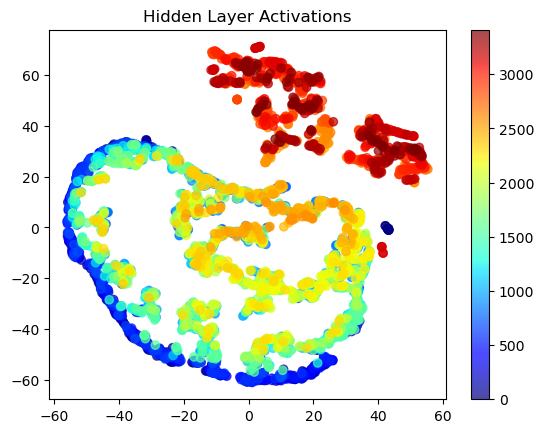

In [153]:
import torch
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE

class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(node_features.shape[1], 16)
        self.conv2 = GCNConv(16, 1)  # Output is one unit for a regression task

    def forward(self, data, return_embeddings=False):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))  # First GCN layer with ReLU activation
        if return_embeddings:
            return x  # Return embeddings after first layer for visualization
        x = self.conv2(x, edge_index)  # Second GCN layer
        return x.squeeze()  # Remove extra dimensions


model = GNN()
model.eval()
embeddings = model(graph_data, return_embeddings=True).detach().numpy()

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
Y = tsne.fit_transform(embeddings)

# Plotting
plt.scatter(Y[:, 0], Y[:, 1], c=range(len(Y)), cmap=matplotlib.colormaps['jet'], alpha=0.7)  # Use sequential colors
plt.colorbar()
plt.title("Hidden Layer Activations")
plt.savefig("./hiddenlayActivations.png")
plt.show()

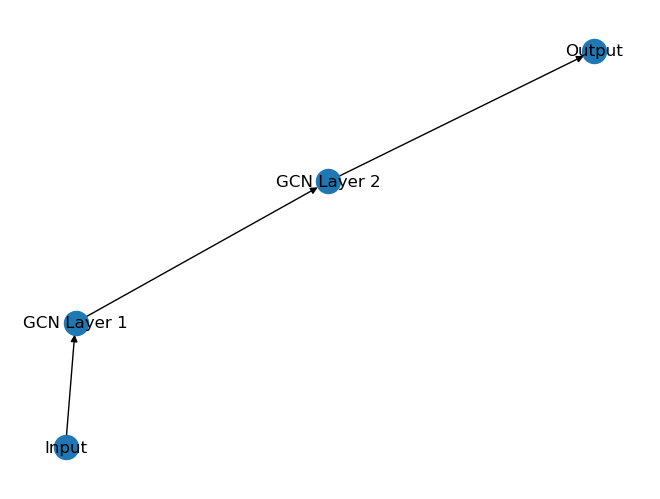

In [154]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with the layer as the node attribute
G.add_node(1, layer='Input')
G.add_node(2, layer='GCN Layer 1')
G.add_node(3, layer='GCN Layer 2')
G.add_node(4, layer='Output')

# Connect nodes
G.add_edges_from([(1, 2), (2, 3), (3, 4)])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
labels = nx.get_node_attributes(G, 'layer')
nx.draw(G, pos, with_labels=False, arrows=True)
nx.draw_networkx_labels(G, pos, labels=labels)
plt.show()

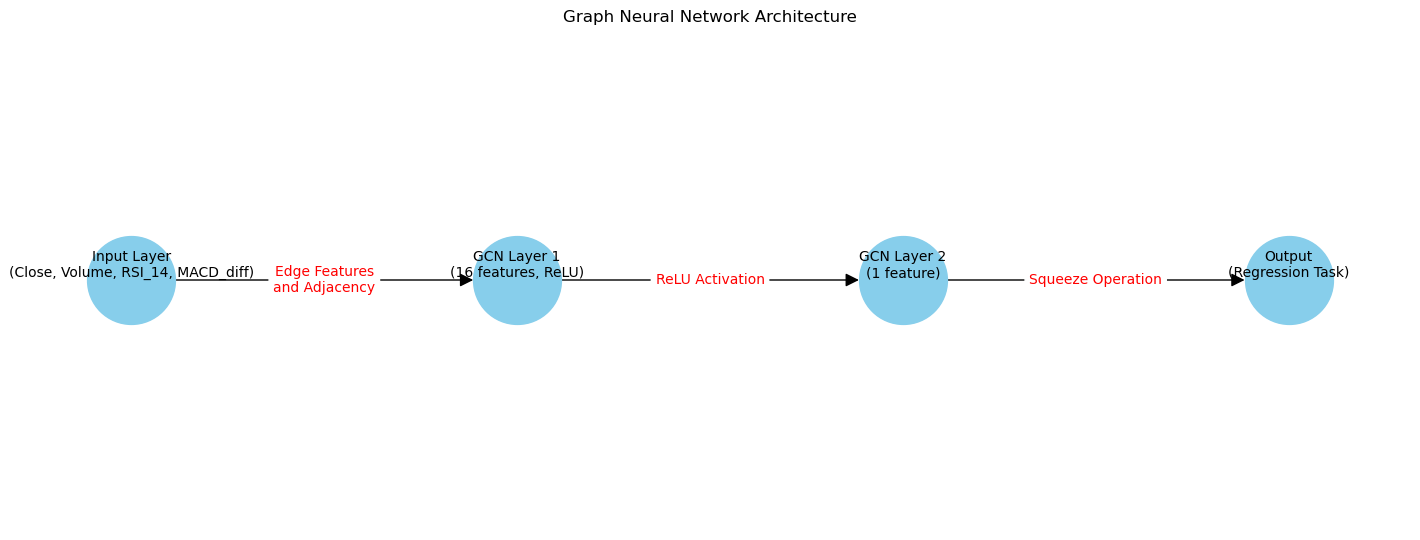

In [155]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_gnn():
    G = nx.DiGraph()  # Directed graph to represent the flow of data

    # Nodes represent layers and features
    G.add_node("Input", label="Input Layer\n(Close, Volume, RSI_14, MACD_diff)")
    G.add_node("GCN1", label="GCN Layer 1\n(16 features, ReLU)")
    G.add_node("GCN2", label="GCN Layer 2\n(1 feature)")
    G.add_node("Output", label="Output\n(Regression Task)")

    # Edges represent the connections between layers
    G.add_edges_from([
        ("Input", "GCN1", {'label': 'Edge Features\nand Adjacency'}),
        ("GCN1", "GCN2", {'label': 'ReLU Activation'}),
        ("GCN2", "Output", {'label': 'Squeeze Operation'})
    ])

    # Manually specify the positions for a left-to-right layout
    pos = {
        "Input": (0, 0),
        "GCN1": (3, 0),
        "GCN2": (6, 0),
        "Output": (9, 0)
    }

    # Draw the graph
    plt.figure(figsize=(14, 5))  # Adjust figure size as needed
    node_labels = {node[0]: node[1]["label"] for node in G.nodes(data=True)}
    edge_labels = {(u, v): data['label'] for u, v, data in G.edges(data=True)}
    
    nx.draw(G, pos, with_labels=False, node_color='skyblue', edge_color='k', node_size=4000, font_size=12, font_color='black', font_weight='bold', arrowsize=20, arrowstyle='-|>')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, verticalalignment='bottom')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', label_pos=0.5)

    plt.title('Graph Neural Network Architecture')
    plt.axis('off')  # Turn off the axis to improve presentation
    
    # Save the figure
    plt.savefig('./GNN_Architecture.png', format='png', dpi=300)  # Adjust path and format as needed
    plt.show()

draw_gnn()

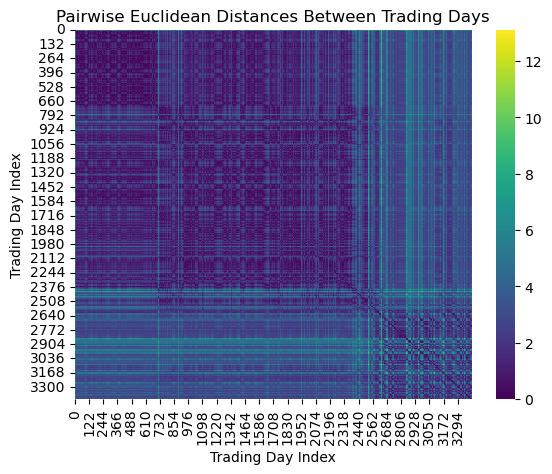

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(distances, cmap='viridis')
plt.title('Pairwise Euclidean Distances Between Trading Days')
plt.xlabel('Trading Day Index')
plt.ylabel('Trading Day Index')
plt.show()


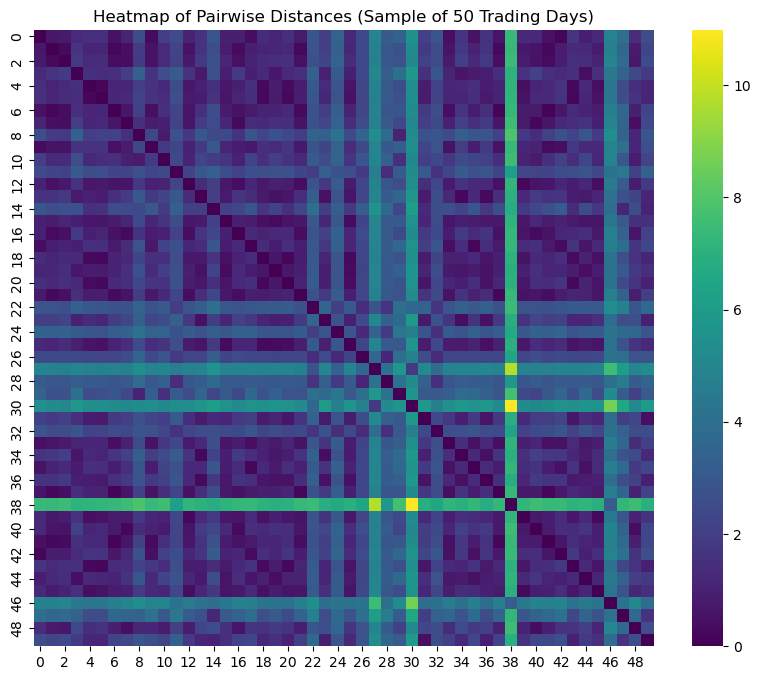

In [157]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


indices = np.random.choice(distances.shape[0], 50, replace=False)
sample_distances = distances[np.ix_(indices, indices)]

plt.figure(figsize=(10, 8))
sns.heatmap(sample_distances, cmap='viridis')
plt.title('Heatmap of Pairwise Distances (Sample of 50 Trading Days)')
plt.savefig("./heatmap_tradingDays")
plt.show()

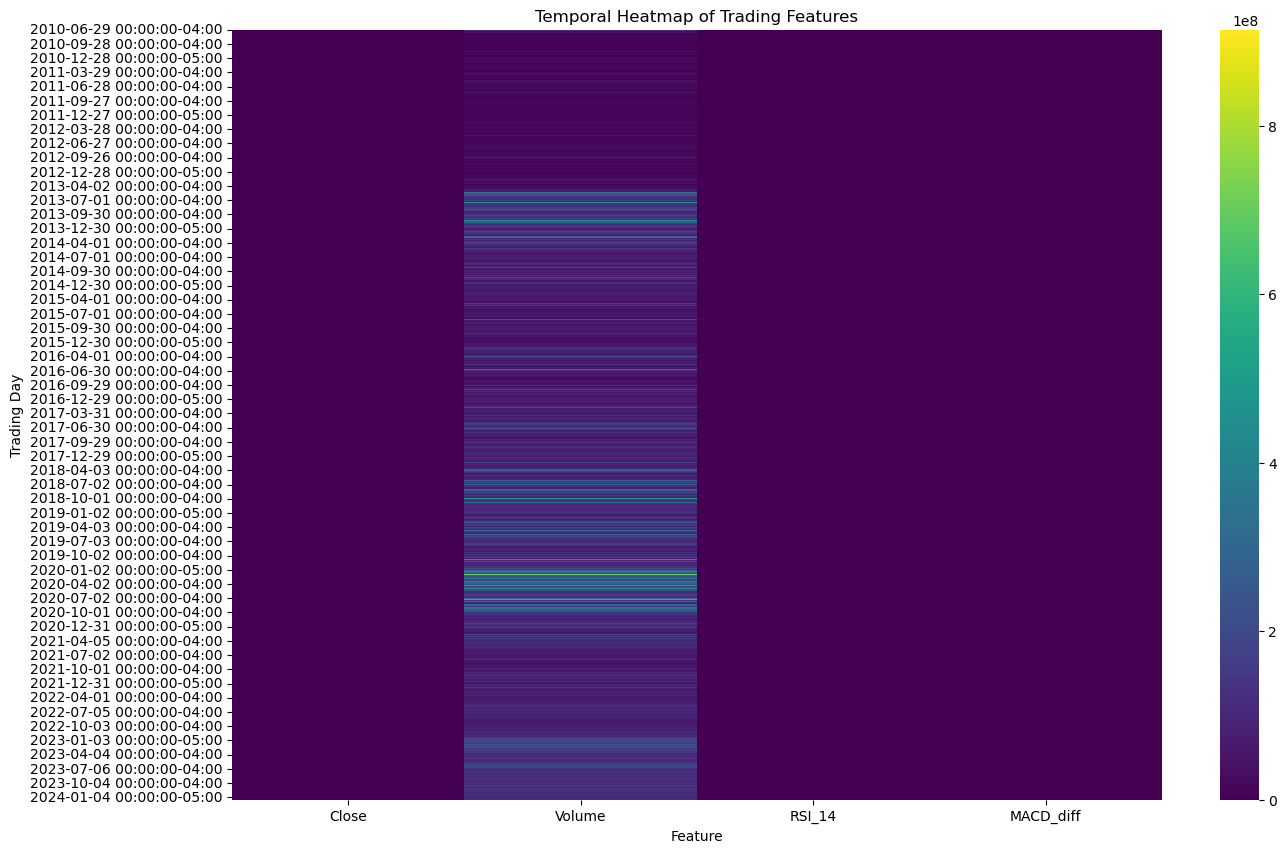

In [158]:
import seaborn as sns
import pandas as pd


plt.figure(figsize=(15, 10))
sns.heatmap(features, cmap='viridis')
plt.title('Temporal Heatmap of Trading Features')
plt.xlabel('Feature')
plt.ylabel('Trading Day')
plt.show()

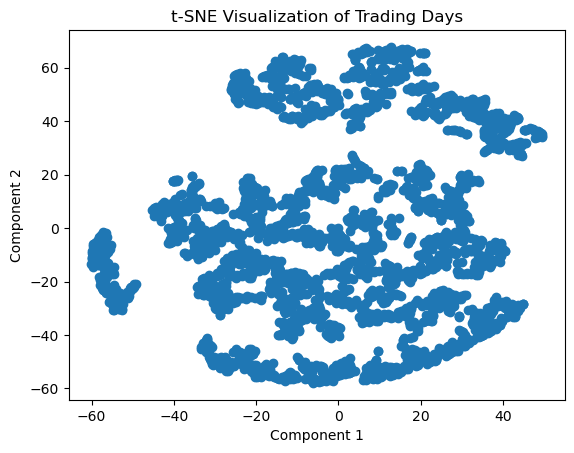

In [159]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
features_transformed = tsne.fit_transform(features_normalized)

plt.scatter(features_transformed[:, 0], features_transformed[:, 1])
plt.title('t-SNE Visualization of Trading Days')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig("t-SNEVisulization")
plt.show()


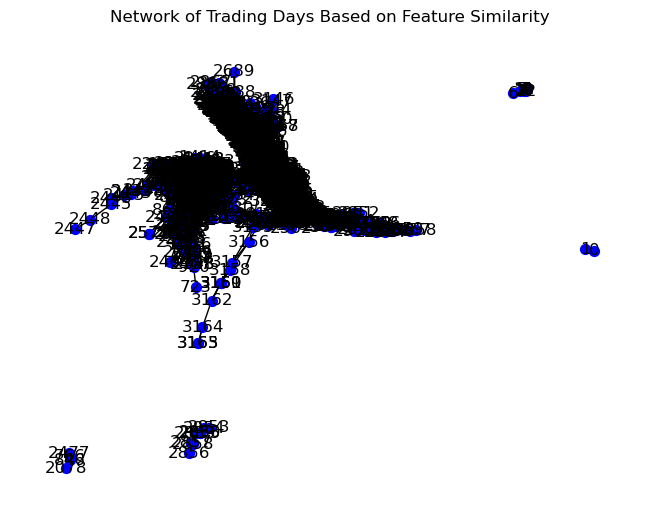

In [160]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for i, j in edge_index.t().numpy():
    G.add_edge(i, j)

pos = nx.spring_layout(G)  # Positions for all nodes for better visual spacing
nx.draw(G, pos, node_size=50, node_color='blue', with_labels=True)
plt.title('Network of Trading Days Based on Feature Similarity')
plt.show()

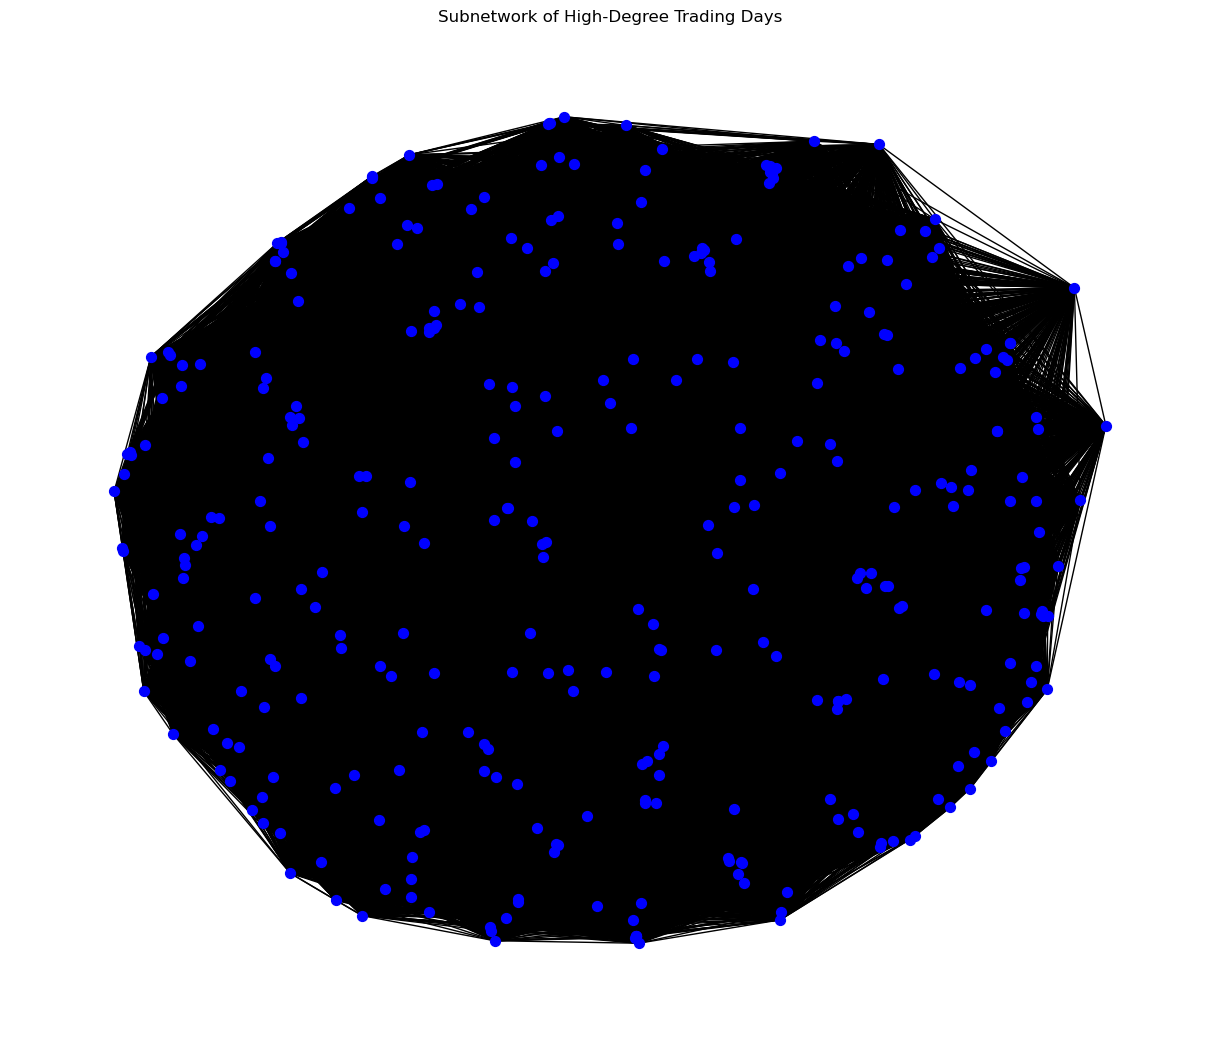

In [161]:
import networkx as nx


G = nx.Graph()
for i, j in edge_index.t().numpy():
    G.add_edge(i, j)

# Extract a subgraph with nodes of high degree
degrees = dict(G.degree())
high_degree_nodes = [node for node, deg in degrees.items() if deg > np.percentile(list(degrees.values()), 90)]
sub_G = G.subgraph(high_degree_nodes)

plt.figure(figsize=(12, 10))
nx.draw(sub_G, with_labels=False, node_size=50, node_color='blue')
plt.title('Subnetwork of High-Degree Trading Days')
plt.show()


/Users/songyuren/anaconda3/envs/GNN/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/songyuren/anaconda3/envs/GNN/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


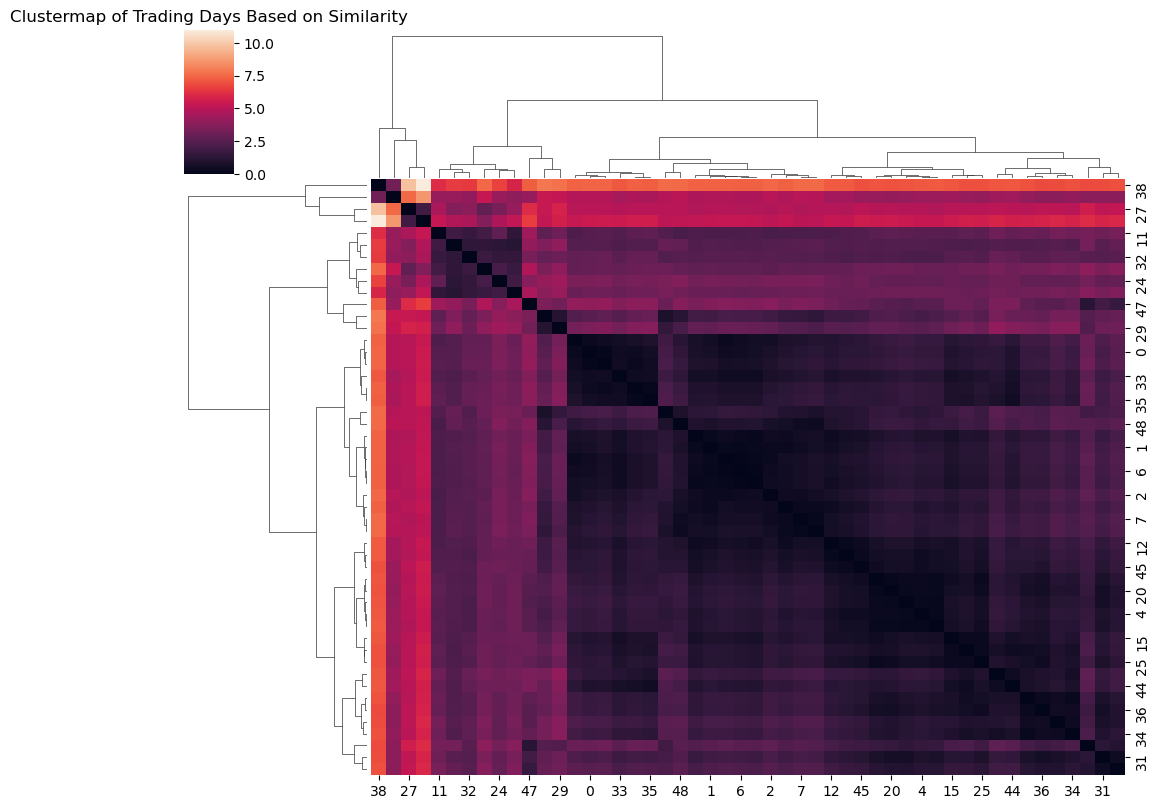

In [162]:
sns.clustermap(sample_distances, method='ward', figsize=(10, 8))
plt.title('Clustermap of Trading Days Based on Similarity')
plt.show()


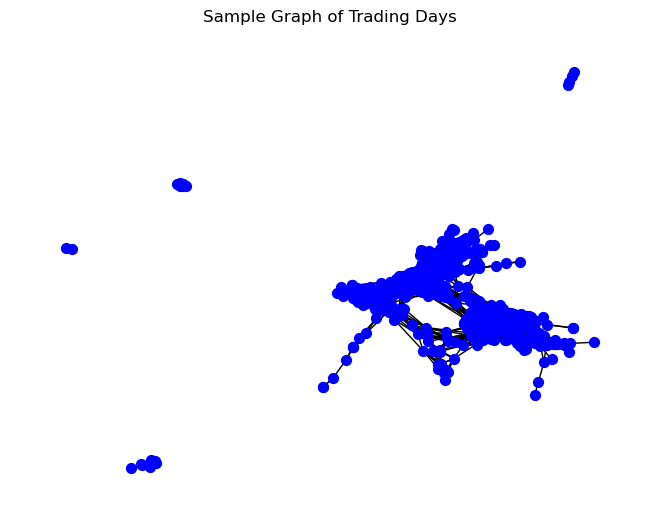

In [163]:
G = nx.Graph()
for edge in edge_index.t().numpy():
    G.add_edge(edge[0], edge[1])

nx.draw(G, node_size=50, node_color='blue', with_labels=False)
plt.title('Sample Graph of Trading Days')
plt.show()

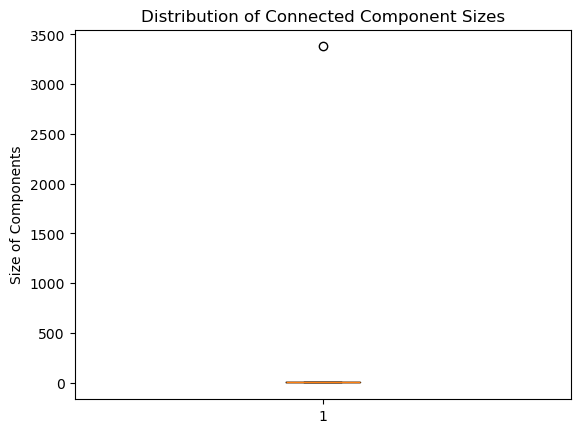

In [164]:
components = list(nx.connected_components(G))
component_sizes = [len(c) for c in components]

plt.boxplot(component_sizes)
plt.title('Distribution of Connected Component Sizes')
plt.ylabel('Size of Components')
plt.show()

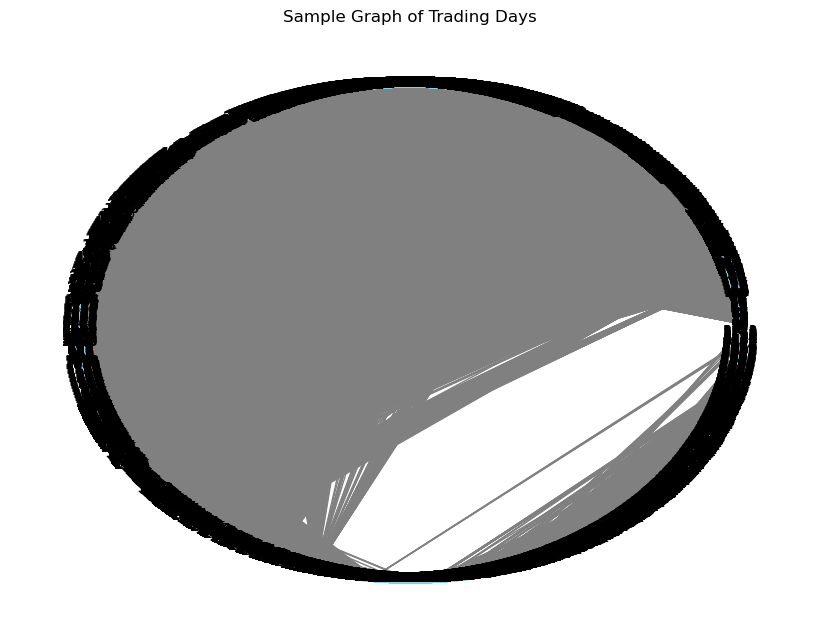

In [165]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add edges from edge_index
for edge in edge_index.t().numpy():
    G.add_edge(edge[0], edge[1])

# Define node color and size
node_color = 'skyblue'
node_size = 50

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(G)  # Circular layout for better visualization
nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=node_size, edge_color='gray', linewidths=0.5, font_size=10, font_color='black')

# Set title and show the plot
plt.title('Sample Graph of Trading Days')
plt.show()

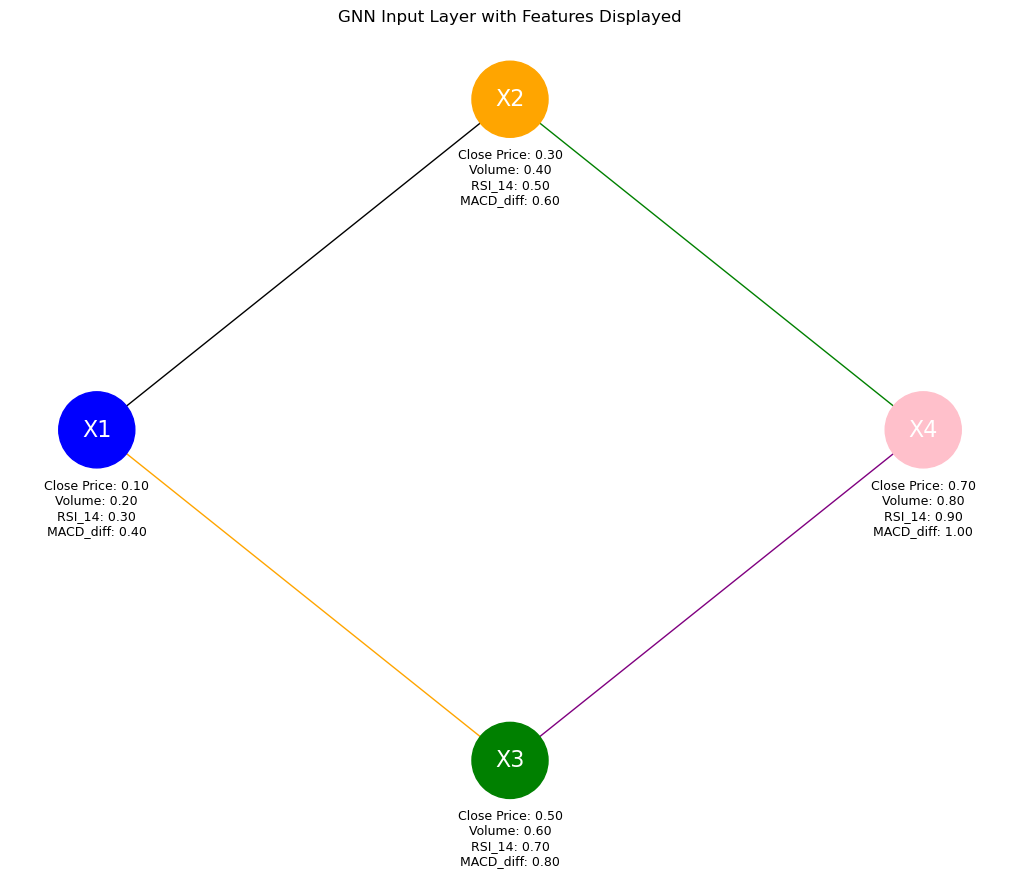

In [166]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.Graph()

# Define node positions manually to match your layout
positions = {1: (0, 1), 2: (1, 2), 3: (1, 0), 4: (2, 1)}

# Add nodes with features (all nodes now have all four features)
features = {
    1: {'label': 'X1', 'color': 'blue', 'features': {'Close Price': 0.1, 'Volume': 0.2, 'RSI_14': 0.3, 'MACD_diff': 0.4}},
    2: {'label': 'X2', 'color': 'orange', 'features': {'Close Price': 0.3, 'Volume': 0.4, 'RSI_14': 0.5, 'MACD_diff': 0.6}},
    3: {'label': 'X3', 'color': 'green', 'features': {'Close Price': 0.5, 'Volume': 0.6, 'RSI_14': 0.7, 'MACD_diff': 0.8}},
    4: {'label': 'X4', 'color': 'pink', 'features': {'Close Price': 0.7, 'Volume': 0.8, 'RSI_14': 0.9, 'MACD_diff': 1.0}}
}

for node, attr in features.items():
    G.add_node(node, **attr)

# Add edges
edges = [(1, 2), (1, 3), (2, 4), (3, 4)]
edge_colors = ['black', 'orange', 'green', 'purple']

for i, edge in enumerate(edges):
    G.add_edge(*edge, color=edge_colors[i])

# Draw the graph with labels enabled
plt.figure(figsize=(10, 8))
node_colors = [attr['color'] for _, attr in G.nodes(data=True)]
nx.draw(G, positions, with_labels=True, labels={node: G.nodes[node]['label'] for node in G.nodes()}, node_color=node_colors, edge_color=edge_colors, node_size=3000, font_size=16, font_color='white')

# Add feature labels next to the nodes
for node, (x, y) in positions.items():
    feature_text = '\n'.join([f"{key}: {val:.2f}" for key, val in G.nodes[node]['features'].items()])
    plt.text(x, y-0.15, feature_text, fontsize=9, ha='center', va='top')

# Show the plot
plt.title("GNN Input Layer with Features Displayed")
plt.axis('off')
plt.show()


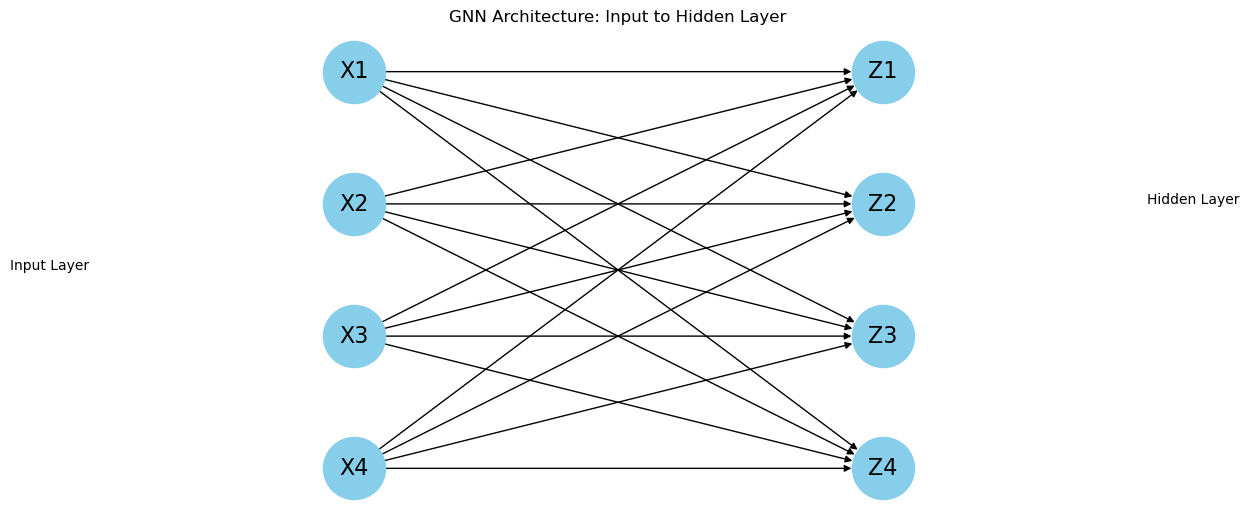

In [167]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.DiGraph()  # Directed graph to show the direction of data flow

# Define positions for nodes in each layer
input_positions = {f'X{i+1}': (0, 3 - i) for i in range(4)}  # Start from X1 to X4
hidden_positions = {f'Z{i+1}': (1, 3 - i) for i in range(4)}  # Start from Z1 to Z4

# Add nodes with positions
for node, pos in {**input_positions, **hidden_positions}.items():
    G.add_node(node, pos=pos)

# Add edges between input and hidden layers
for i in input_positions:
    for j in hidden_positions:
        G.add_edge(i, j)

# Draw the graph with labels and positions adjusted for visual clarity
pos = {**input_positions, **hidden_positions}
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, arrows=True, font_size=16)

# Draw labels for layers
plt.text(-0.5, 1.5, 'Input Layer', horizontalalignment='right')
plt.text(1.5, 2, 'Hidden Layer', horizontalalignment='left')

plt.title("GNN Architecture: Input to Hidden Layer")
plt.axis('off')  # Hide the axes
plt.show()


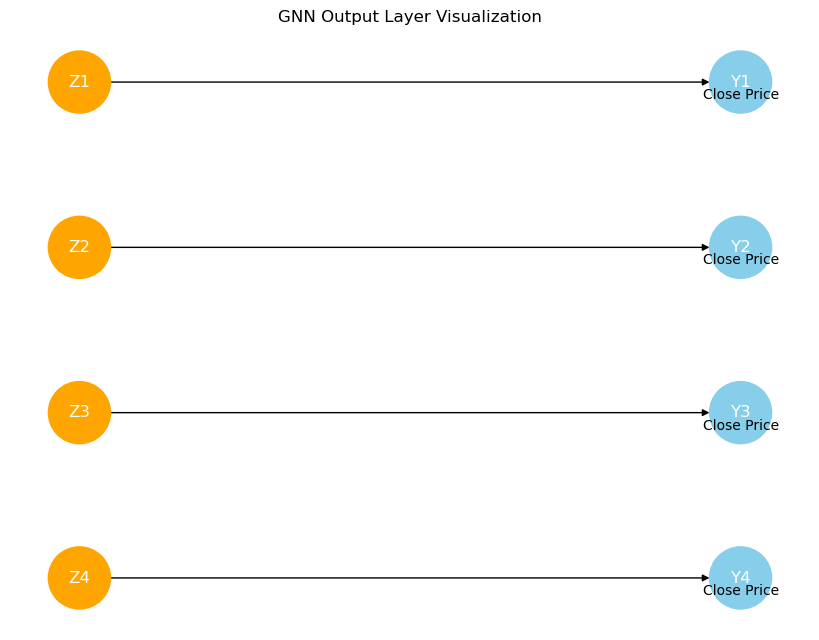

In [168]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph object
G = nx.DiGraph()

# Define node positions for the hidden and output layers
hidden_positions = {f'Z{i}': (1, 4-i) for i in range(1, 5)}  # i from 1 to 4, inclusive
output_positions = {f'Y{i}': (2, 4-i) for i in range(1, 5)}

# Add nodes with color attributes to the graph
for node, pos in hidden_positions.items():
    G.add_node(node, pos=pos, color='orange')  # Set color for hidden layer nodes
for node, pos in output_positions.items():
    G.add_node(node, pos=pos, color='skyblue')  # Set color for output layer nodes

# Add edges between hidden and output layers
for i in range(1, 5):
    G.add_edge(f'Z{i}', f'Y{i}')

# Combine positions into a single dictionary
pos = {**hidden_positions, **output_positions}

# Define node colors based on their layer
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

# Drawing the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', node_size=2000, font_size=12, font_color='white')

# Adding text below the output nodes to specify they represent "close price"
for node in output_positions:
    x, y = pos[node]
    plt.text(x, y-0.1, 'Close Price', fontsize=10, ha='center')

# Add a title and turn off the axis
plt.title('GNN Output Layer Visualization')
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()


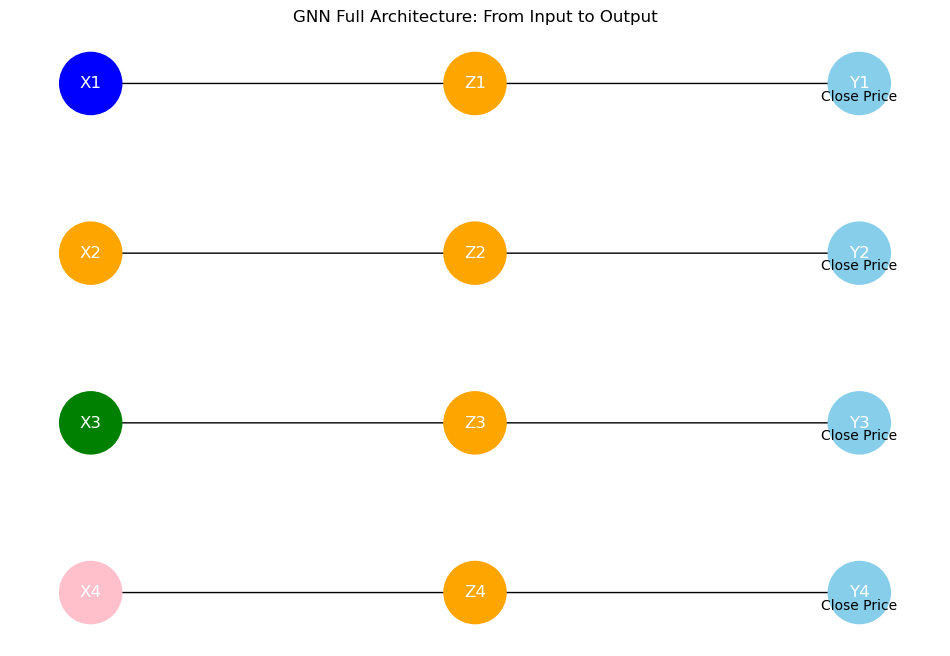

In [169]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph object
G = nx.DiGraph()

# Define positions for all layers: input, hidden, and output
positions = {
    **{f'X{i+1}': (0, 3-i) for i in range(4)},  # Input positions
    **{f'Z{i+1}': (1, 3-i) for i in range(4)},  # Hidden positions
    **{f'Y{i+1}': (2, 3-i) for i in range(4)}  # Output positions
}

# Add nodes with attributes for all layers
features = {
    'X1': {'color': 'blue'}, 'X2': {'color': 'orange'}, 'X3': {'color': 'green'}, 'X4': {'color': 'pink'},
    'Z1': {'color': 'orange'}, 'Z2': {'color': 'orange'}, 'Z3': {'color': 'orange'}, 'Z4': {'color': 'orange'},
    'Y1': {'color': 'skyblue'}, 'Y2': {'color': 'skyblue'}, 'Y3': {'color': 'skyblue'}, 'Y4': {'color': 'skyblue'}
}

for node, attr in features.items():
    G.add_node(node, pos=positions[node], **attr)

# Add edges between layers
for i in range(1, 5):
    G.add_edge(f'X{i}', f'Z{i}')  # Input to hidden
    G.add_edge(f'Z{i}', f'Y{i}')  # Hidden to output

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, positions, node_color=[G.nodes[n]['color'] for n in G.nodes()], node_size=2000)
nx.draw_networkx_labels(G, positions, font_color='white', font_size=12)
nx.draw_networkx_edges(G, positions, edge_color='black', arrowstyle='-|>', arrowsize=10)

# Label 'Close Price' below output nodes
for i in range(1, 5):
    x, y = positions[f'Y{i}']
    plt.text(x, y-0.1, 'Close Price', fontsize=10, ha='center')

plt.title("GNN Full Architecture: From Input to Output")
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()

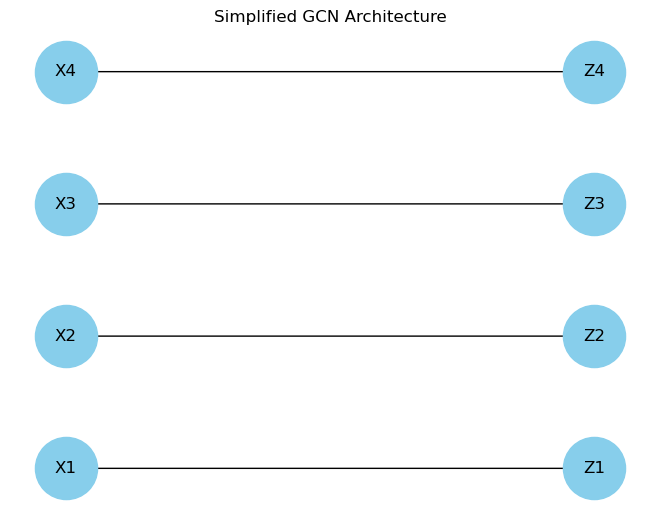

In [170]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()
input_nodes = ['X1', 'X2', 'X3', 'X4']
hidden_nodes = ['Z1', 'Z2', 'Z3', 'Z4']
node_positions = {**{n: (0, i) for i, n in enumerate(input_nodes)}, **{n: (1, i) for i, n in enumerate(hidden_nodes)}}

# Add nodes
for node in input_nodes + hidden_nodes:
    G.add_node(node)


connections = [('X1', 'Z1'), ('X2', 'Z2'), ('X3', 'Z3'), ('X4', 'Z4')] 
G.add_edges_from(connections)

# Draw the graph
nx.draw(G, pos=node_positions, with_labels=True, node_color='skyblue', node_size=2000, arrows=True, font_size=12)
plt.title("Simplified GCN Architecture")
plt.axis('off')
plt.show()

In [171]:
import pandas as pd
import mplfinance as mpf

# Load data from CSV
file_path = './AAPL_full_history_stock_data.csv'  # Update this to your CSV file path
# Load the data without setting the index first
aapl_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime manually and handle timezone
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'], utc=True)

# Set the 'Date' column as the index
aapl_data.set_index('Date', inplace=True)


aapl_data.index = aapl_data.index.tz_convert(None)  # Convert to naive UTC or specify another timezone

# Check data
print(aapl_data.head())

                         Open      High       Low     Close     Volume  \
Date                                                                     
1980-12-12 05:00:00  0.099319  0.099750  0.099319  0.099319  469033600   
1980-12-15 05:00:00  0.094569  0.094569  0.094137  0.094137  175884800   
1980-12-16 05:00:00  0.087659  0.087659  0.087228  0.087228  105728000   
1980-12-17 05:00:00  0.089387  0.089818  0.089387  0.089387   86441600   
1980-12-18 05:00:00  0.091978  0.092410  0.091978  0.091978   73449600   

                     Dividends  Stock Splits  
Date                                          
1980-12-12 05:00:00        0.0           0.0  
1980-12-15 05:00:00        0.0           0.0  
1980-12-16 05:00:00        0.0           0.0  
1980-12-17 05:00:00        0.0           0.0  
1980-12-18 05:00:00        0.0           0.0  


In [172]:
save_options = {
    'fname': 'AAPLLinePLot.jpg',  # file name and format
    'dpi': 300,                             # resolution in dots per inch
    'pad_inches': 0.1                       # padding
}

mpf.plot(aapl_data, type='line', style='charles', title='AAPL Stock Price Overview',
         ylabel='Price ($)', figsize=(12, 6), savefig=save_options)

In [174]:
import pandas as pd
import mplfinance as mpf

# Load data from CSV
file_path = './TSLA.csv'  # Update this to your CSV file path
# Load the data without setting the index first
TSLA_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime manually and handle timezone
TSLA_data['Date'] = pd.to_datetime(TSLA_data['Date'], utc=True)

# Set the 'Date' column as the index
TSLA_data.set_index('Date', inplace=True)

# Optionally convert timezone or remove it
TSLA_data.index = TSLA_data.index.tz_convert(None)  # Convert to naive UTC or specify another timezone

# Check data
print(TSLA_data.head())

                         Open      High       Low     Close     Volume  \
Date                                                                     
2010-06-29 04:00:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 04:00:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 04:00:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 04:00:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 04:00:00  1.333333  1.333333  1.055333  1.074000  103003500   

                     Dividends  Stock Splits  
Date                                          
2010-06-29 04:00:00        0.0           0.0  
2010-06-30 04:00:00        0.0           0.0  
2010-07-01 04:00:00        0.0           0.0  
2010-07-02 04:00:00        0.0           0.0  
2010-07-06 04:00:00        0.0           0.0  


In [175]:
save_options = {
    'fname': 'TSLALinePLot.jpg',  # file name and format
    'dpi': 300,                             # resolution in dots per inch
    'pad_inches': 0.1                       # padding
}

mpf.plot(TSLA_data, type='line', style='charles', title='TSLA Stock Price Overview',
         ylabel='Price ($)', figsize=(12, 6), savefig=save_options)

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [177]:
# Load data from CSV
file_path = './AAPL_full_history_stock_data.csv'  # Update this to your CSV file path
# Load the data without setting the index first
aapl_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime manually and handle timezone
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'], utc=True)

# Set the 'Date' column as the index

aapl_data.set_index('Date', inplace=True)

aapl_data.index = aapl_data.index.tz_convert(None)

/var/folders/vc/rsz0psl95p91gtznnnjzrxb80000gn/T/ipykernel_96551/443417847.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl_data['Close'] = aapl_data['Close'].fillna(method='ffill')


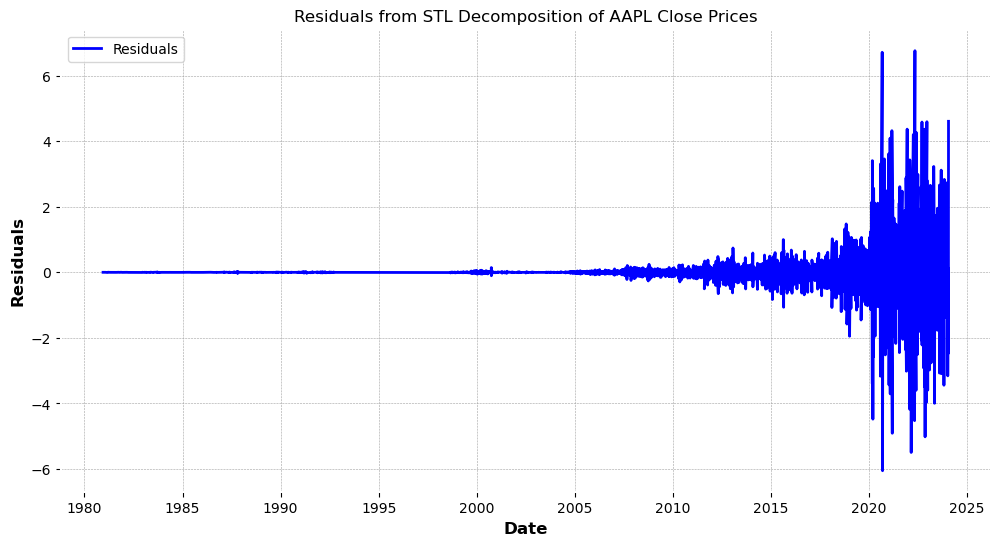

In [178]:
# Ensure datetime index and possibly resample
aapl_data.index = pd.to_datetime(aapl_data.index)
aapl_data = aapl_data.resample('D').mean()  # Adjust resampling as necessary
aapl_data['Close'] = aapl_data['Close'].fillna(method='ffill')

# STL Decomposition
stl = STL(aapl_data['Close'], seasonal=7)  # Adjust the seasonal parameter as needed
result = stl.fit()
residuals = result.resid

# Plotting the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.title('Residuals from STL Decomposition of AAPL Close Prices')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.savefig("./STLAPPL.png")
plt.show()

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [180]:
# Load data from CSV
file_path = './TSLA.csv'  # Update this to your CSV file path
# Load the data without setting the index first
tsla_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime manually and handle timezone
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'], utc=True)

# Set the 'Date' column as the index

tsla_data.set_index('Date', inplace=True)

tsla_data.index = tsla_data.index.tz_convert(None)

/var/folders/vc/rsz0psl95p91gtznnnjzrxb80000gn/T/ipykernel_96551/3632591939.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data['Close'] = tsla_data['Close'].fillna(method='ffill')


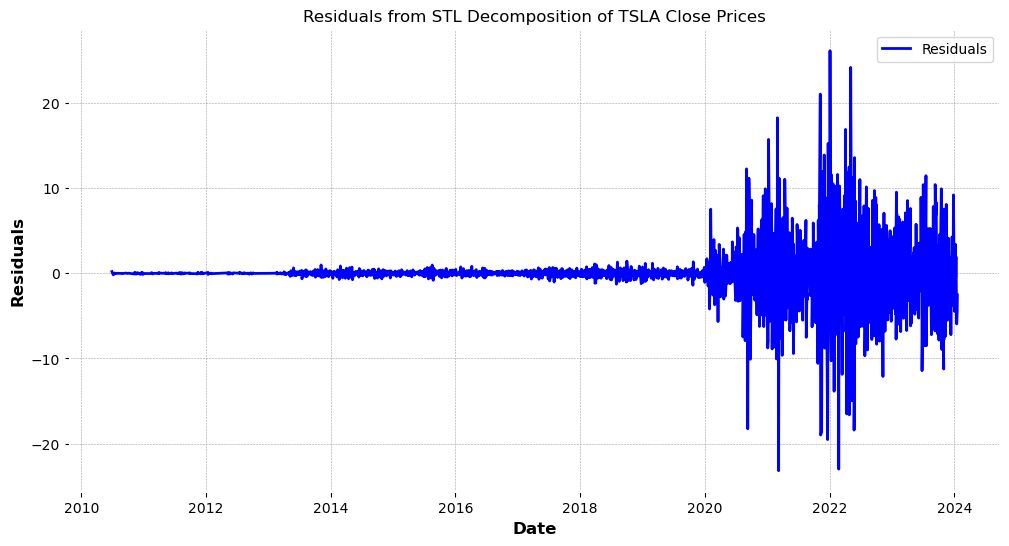

In [181]:
# Ensure datetime index and possibly resample
tsla_data.index = pd.to_datetime(tsla_data.index)
tsla_data = tsla_data.resample('D').mean()  # Adjust resampling as necessary
tsla_data['Close'] = tsla_data['Close'].fillna(method='ffill')

# STL Decomposition
stl = STL(tsla_data['Close'], seasonal=7)  # Adjust the seasonal parameter as needed
result = stl.fit()
residuals = result.resid

# Plotting the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.title('Residuals from STL Decomposition of TSLA Close Prices')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.savefig("./STLTSLA.png")
plt.show()